### Build a transaction analysis engine that will detect anomolies in a collection of bank statements

# 1. Introduction

## 1.2 Classification of Financial Anomalies

The task at hand is to analyze transactions from bank statements to determine patterns and spot 
anomalies. These transactions will be grouped and sorted separately, based on the analysis, to 
support various compliance procedures. By identifying and flagging suspicious behavior, the 
system can highlight accounts that require additional scrutiny. Integrating transaction analysis 
into the KYC automation process is essential for maintaining robust compliance.
Detecting money laundering from transactions is crucial for several reasons. Money laundering 
undermines the integrity of financial institutions and markets by allowing criminals to disguise 
the origins of illegally obtained money, making it difficult for authorities to trace and recover 
illicit funds.

# 2. Environment Setup and Verification

## 2.1 Python Libraries Import

In [2]:
# Parameters cell
input_csv_path = "Downloads/Banking Transactional Data 2024(DataSet).csv"


In [3]:
!python -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install numpy pandas scikit-learn seaborn matplotlib
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install papermill

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install ipython jupyter


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [9]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [10]:
# Importing utilities
import os
import sys
from datetime import datetime
import warnings

# Ignore potential warnings
warnings.filterwarnings("ignore")

# Importing data science libraries
import pandas as pd
import numpy as np
import random as rd

# Importing visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from IPython.display import Image, display

# Setting the visualization style
sns.set_style('darkgrid')

# Allow for Jupyter notebook inline plotting
%matplotlib inline

# Importing machine learning 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Improting Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, Layer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2



# 3. Financial Fraud Detection Dataset

In [11]:
Banking_Transactions_dataset = pd.read_csv('Downloads/Banking Transactional Data 2024(DataSet).csv', encoding='cp1252')
Banking_Transactions_dataset.head()

,Date Range,Total CR Turnover,Total of Growth Turnover,Account Name,Account Open Date,Account Number,Sort Code,Total Transactions,Transaction on Date,Transaction Type,...,Ben Account Name,Ben Account Details,Country,City,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"4,000,000,000",1/2/2021,Cash Deposit Account for Business Operations,...,EasyJet Airline Company Limited,22256788215676,UK,London,NaN,NaN,NaN,NaN,NaN,NaN
1,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London,NaN,NaN,NaN,NaN,NaN,NaN
2,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London,NaN,NaN,NaN,NaN,NaN,NaN
3,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London,NaN,NaN,NaN,NaN,NaN,NaN
4,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Drop the unnamed columns 22 to 27 and Credit Only
columns_to_drop = ['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27','Credit Only']
Banking_Transactions_dataset_clean = Banking_Transactions_dataset.drop(columns=columns_to_drop)

Banking_Transactions_dataset_clean.head()

,Date Range,Total CR Turnover,Total of Growth Turnover,Account Name,Account Open Date,Account Number,Sort Code,Total Transactions,Transaction on Date,Transaction Type,...,Growth GBP,Payer account number,Payer account name,Caustic Narrative,Ben Account Number,Account Bank Name,Ben Account Name,Ben Account Details,Country,City
0,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"4,000,000,000",1/2/2021,Cash Deposit Account for Business Operations,...,"4,000,000,000",12345678,EasyJet Airline Company Limited,Account opening,22256788,Macquarie Bank Limited,EasyJet Airline Company Limited,22256788215676,UK,London
1,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,978,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
2,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,956,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
3,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,934,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
4,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,912,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London


## 3.1 Initial Data and Attribute Assessment

In [13]:
print(Banking_Transactions_dataset_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date Range                5999 non-null   object
 1   Total CR Turnover         5999 non-null   object
 2   Total of Growth Turnover  5999 non-null   object
 3   Account Name              5999 non-null   object
 4   Account Open Date         5999 non-null   object
 5   Account Number            5999 non-null   int64 
 6   Sort Code                 5999 non-null   int64 
 7   Total Transactions        5999 non-null   object
 8   Transaction on Date       5999 non-null   object
 9   Transaction Type          5999 non-null   object
 10  GBP Equiv                 5999 non-null   object
 11  Growth GBP                5999 non-null   object
 12  Payer account number      5999 non-null   int64 
 13  Payer account name        5999 non-null   object
 14  Caustic Narrative       

In [14]:
print(Banking_Transactions_dataset_clean.describe())

       Account Number      Sort Code  Payer account number  Ben Account Number
count    5.999000e+03    5999.000000          5.999000e+03        5.999000e+03
mean     1.257060e+07  125859.915319          1.236596e+07        1.274336e+07
std      1.419038e+06   13185.737900          1.998425e+04        1.908414e+06
min      1.234562e+07  123456.000000          1.234562e+07        1.234562e+07
25%      1.234568e+07  123463.000000          1.234568e+07        1.234568e+07
50%      1.234569e+07  123475.000000          1.238534e+07        1.234569e+07
75%      1.238566e+07  124342.000000          1.238566e+07        1.238566e+07
max      2.225779e+07  215676.000000          1.238666e+07        2.225779e+07


In [15]:
print(Banking_Transactions_dataset_clean.isnull().sum())

Date Range                  0
Total CR Turnover           0
Total of Growth Turnover    0
Account Name                0
Account Open Date           0
Account Number              0
Sort Code                   0
Total Transactions          0
Transaction on Date         0
Transaction Type            0
GBP Equiv                   0
Growth GBP                  0
Payer account number        0
Payer account name          0
Caustic Narrative           0
Ben Account Number          0
Account Bank Name           1
Ben Account Name            0
Ben Account Details         0
Country                     0
City                        0
dtype: int64


In [16]:
print(Banking_Transactions_dataset_clean.dtypes)

Date Range                  object
Total CR Turnover           object
Total of Growth Turnover    object
Account Name                object
Account Open Date           object
Account Number               int64
Sort Code                    int64
Total Transactions          object
Transaction on Date         object
Transaction Type            object
GBP Equiv                   object
Growth GBP                  object
Payer account number         int64
Payer account name          object
Caustic Narrative           object
Ben Account Number           int64
Account Bank Name           object
Ben Account Name            object
Ben Account Details         object
Country                     object
City                        object
dtype: object


In [17]:
Banking_Transactions_dataset_clean['Account Open Date'] = pd.to_datetime(Banking_Transactions_dataset_clean['Account Open Date'])
Banking_Transactions_dataset_clean['Transaction on Date'] = pd.to_datetime(Banking_Transactions_dataset_clean['Transaction on Date'])

## 3.2 Pre-Processing of Categorical Transaction Attributes

In [18]:
# categorical columns
categorical_columns = Banking_Transactions_dataset_clean.select_dtypes(include=['object']).columns

# Handle missing values by filling with mode
for column in categorical_columns:
    Banking_Transactions_dataset_clean[column].fillna(Banking_Transactions_dataset_clean[column].mode()[0], inplace=True)

# One-Hot Encoding
Banking_Transactions_dataset_clean = pd.get_dummies(Banking_Transactions_dataset_clean, columns=categorical_columns, drop_first=True)

# Convert boolean columns to integers (0 and 1)
boolean_columns = Banking_Transactions_dataset_clean.select_dtypes(include=['bool']).columns
Banking_Transactions_dataset_clean[boolean_columns] = Banking_Transactions_dataset_clean[boolean_columns].astype(int)

print(Banking_Transactions_dataset_clean.head())
print(Banking_Transactions_dataset_clean.info())
Banking_Transactions_Categorical_Attributes = Banking_Transactions_dataset_clean.copy()
Banking_Transactions_Categorical_Attributes.head()


  Account Open Date  Account Number  Sort Code Transaction on Date  \
0        2021-01-02        12345678     123456          2021-01-02   
1        2021-01-02        12345678     123456          2021-01-02   
2        2021-01-02        12345678     123456          2021-01-02   
3        2021-01-02        12345678     123456          2021-01-02   
4        2021-01-02        12345678     123456          2021-01-02   

   Payer account number  Ben Account Number  Total CR Turnover_£  \
0              12345678            22256788                    1   
1              12345678            22256789                    1   
2              12345678            22256789                    1   
3              12345678            22256789                    1   
4              12345678            22256789                    1   

   Total CR Turnover_€  Total of Growth Turnover_£  \
0                    0                           1   
1                    0                           1   
2       

,Account Open Date,Account Number,Sort Code,Transaction on Date,Payer account number,Ben Account Number,Total CR Turnover_£,Total CR Turnover_€,Total of Growth Turnover_£,Total of Growth Turnover_€,...,City_Berlin,City_Brussels,City_Dublin,City_Geneve,City_London,City_Madrid,City_Manilla,City_Moscow,City_Paris,City_Vienna
0,2021-01-02,12345678,123456,2021-01-02,12345678,22256788,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [19]:
# Checking for NaN and infinite values in the entire dataset
nan_counts = Banking_Transactions_Categorical_Attributes.isna().sum()
inf_counts = Banking_Transactions_Categorical_Attributes.applymap(lambda x: isinstance(x, float) and np.isinf(x)).sum()

nan_counts_nonzero = nan_counts[nan_counts > 0]
inf_counts_nonzero = inf_counts[inf_counts > 0]

nan_counts_nonzero, inf_counts_nonzero

(Series([], dtype: int64), Series([], dtype: int64))

## 3.3 Pre-Processing of Numerical Transaction Attributes

In [20]:
# Drop the unnamed columns 22 to 27 and Credit Only
columns_to_drop = ['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27','Credit Only']
Banking_Transactions_dataset_clean = Banking_Transactions_dataset.drop(columns=columns_to_drop)

Banking_Transactions_dataset_clean.head()

,Date Range,Total CR Turnover,Total of Growth Turnover,Account Name,Account Open Date,Account Number,Sort Code,Total Transactions,Transaction on Date,Transaction Type,...,Growth GBP,Payer account number,Payer account name,Caustic Narrative,Ben Account Number,Account Bank Name,Ben Account Name,Ben Account Details,Country,City
0,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"4,000,000,000",1/2/2021,Cash Deposit Account for Business Operations,...,"4,000,000,000",12345678,EasyJet Airline Company Limited,Account opening,22256788,Macquarie Bank Limited,EasyJet Airline Company Limited,22256788215676,UK,London
1,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,978,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
2,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,956,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
3,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,934,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
4,from 01/01/2021 to 31/12/2021,£,£,EasyJet Airline Company Limited,1/2/2021,12345678,123456,"(22,000,000)",1/2/2021,Aircraft Leasing,...,"3,912,000,000",12345678,EasyJet Airline Company Limited,Leasing one Airbus A380,22256789,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London


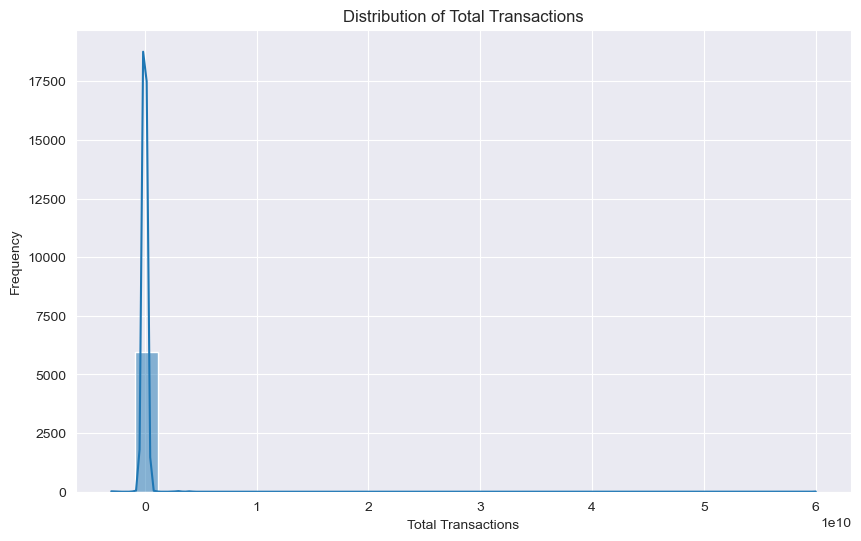

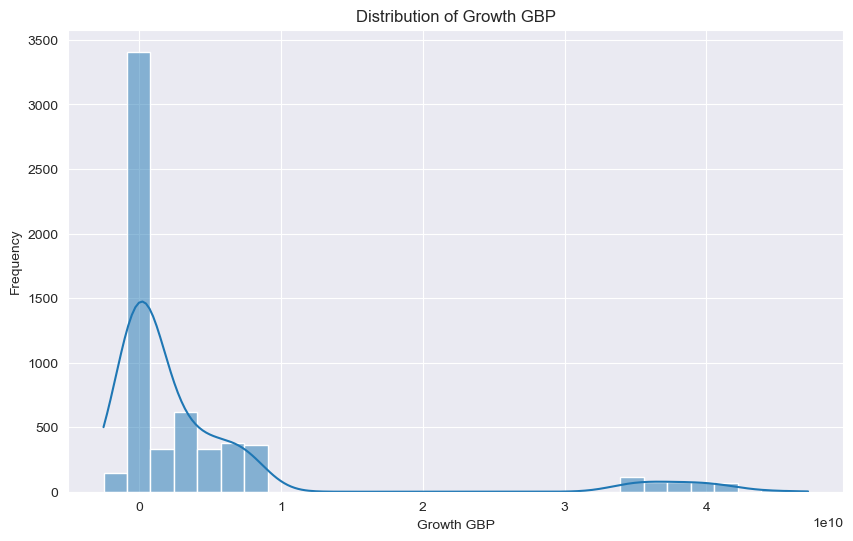

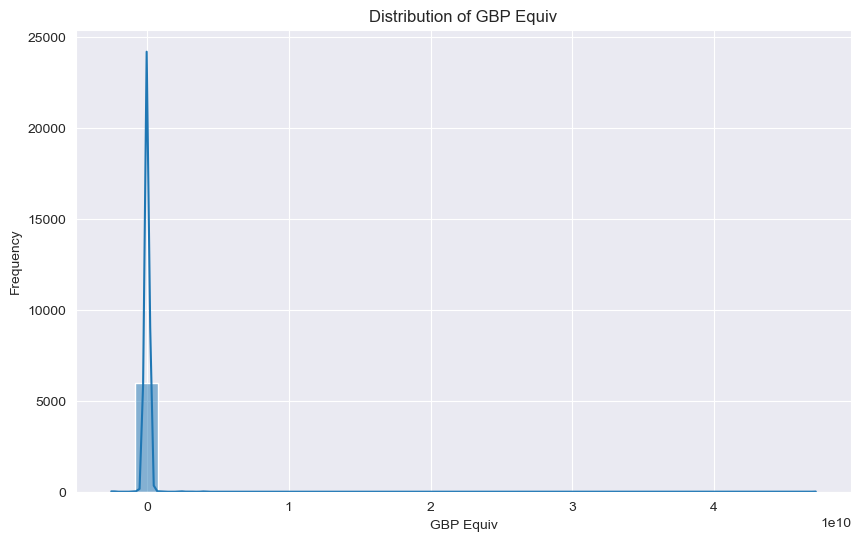

                      Date Range Total CR Turnover Total of Growth Turnover  \
0  from 01/01/2021 to 31/12/2021                 £                        £   
1  from 01/01/2021 to 31/12/2021                 £                        £   
2  from 01/01/2021 to 31/12/2021                 £                        £   
3  from 01/01/2021 to 31/12/2021                 £                        £   
4  from 01/01/2021 to 31/12/2021                 £                        £   

                      Account Name Account Open Date  Account Number  \
0  EasyJet Airline Company Limited          1/2/2021        12345678   
1  EasyJet Airline Company Limited          1/2/2021        12345678   
2  EasyJet Airline Company Limited          1/2/2021        12345678   
3  EasyJet Airline Company Limited          1/2/2021        12345678   
4  EasyJet Airline Company Limited          1/2/2021        12345678   

   Sort Code  Total Transactions Transaction on Date  \
0     123456        4.000000e+09    

In [21]:
# Define a function to clean and convert columns to numeric
def clean_numeric(column):
    if column.dtype == 'object':  
        
        column = column.str.replace(',', '', regex=False)
        column = column.str.replace('(', '-', regex=False)
        column = column.str.replace(')', '', regex=False)
        column = column.str.replace('%', '', regex=False)
    return pd.to_numeric(column, errors='coerce')

# Define the columns to be cleaned and converted
columns_to_convert = ['GBP Equiv', 'Total Transactions', 'Growth GBP']

# Clean and convert specified columns to numeric
for column in columns_to_convert:
    if column in Banking_Transactions_dataset.columns:
        Banking_Transactions_dataset_clean[column] = clean_numeric(Banking_Transactions_dataset_clean[column])

# Fill missing values with the median of each column
for column in columns_to_convert:
    if column in Banking_Transactions_dataset_clean.columns:
        Banking_Transactions_dataset_clean[column].fillna(Banking_Transactions_dataset_clean[column].median(), inplace=True)

Banking_Transactions_Numerical_Attributes = Banking_Transactions_dataset_clean.copy()

# Distribution of 'Total Transactions'
plt.figure(figsize=(10, 6))
sns.histplot(Banking_Transactions_Numerical_Attributes['Total Transactions'], kde=True, bins=30)
plt.title('Distribution of Total Transactions')
plt.xlabel('Total Transactions')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'Growth GBP'
plt.figure(figsize=(10, 6))
sns.histplot(Banking_Transactions_Numerical_Attributes['Growth GBP'], kde=True, bins=30)
plt.title('Distribution of Growth GBP')
plt.xlabel('Growth GBP')
plt.ylabel('Frequency')
plt.show()

# Distribution of 'GBP Equiv'
plt.figure(figsize=(10, 6))
sns.histplot(Banking_Transactions_Numerical_Attributes['GBP Equiv'], kde=True, bins=30)
plt.title('Distribution of GBP Equiv')
plt.xlabel('GBP Equiv')
plt.ylabel('Frequency')
plt.show()

print(Banking_Transactions_Numerical_Attributes.head())

In [22]:
# Checking for NaN and infinite values in the entire dataset
nan_counts = Banking_Transactions_Numerical_Attributes.isna().sum()
inf_counts = Banking_Transactions_Numerical_Attributes.applymap(lambda x: isinstance(x, float) and np.isinf(x)).sum()

nan_counts_nonzero = nan_counts[nan_counts > 0]
inf_counts_nonzero = inf_counts[inf_counts > 0]

nan_counts_nonzero, inf_counts_nonzero

(Account Bank Name    1
 dtype: int64,
 Series([], dtype: int64))

In [23]:
mode_value  = Banking_Transactions_Numerical_Attributes['Account Bank Name'].mode()[0]
Banking_Transactions_Numerical_Attributes['Account Bank Name'].fillna(mode_value, inplace=True)

In [24]:
Banking_Transactions_Preprocessed = pd.concat([Banking_Transactions_Categorical_Attributes, Banking_Transactions_Numerical_Attributes], axis=1)
# Checking for duplicate columns in the dataframe
duplicate_columns = Banking_Transactions_Preprocessed.columns[Banking_Transactions_Preprocessed.columns.duplicated()].unique()

# Removing only the duplicate columns from the dataframe
Banking_Transactions_Preprocessed = Banking_Transactions_Preprocessed.loc[:, ~Banking_Transactions_Preprocessed.columns.duplicated()]

Banking_Transactions_Preprocessed.head()


,Account Open Date,Account Number,Sort Code,Transaction on Date,Payer account number,Ben Account Number,Total CR Turnover_£,Total CR Turnover_€,Total of Growth Turnover_£,Total of Growth Turnover_€,...,Transaction Type,GBP Equiv,Growth GBP,Payer account name,Caustic Narrative,Account Bank Name,Ben Account Name,Ben Account Details,Country,City
0,2021-01-02,12345678,123456,2021-01-02,12345678,22256788,1,0,1,0,...,Cash Deposit Account for Business Operations,4.000000e+09,4.000000e+09,EasyJet Airline Company Limited,Account opening,Macquarie Bank Limited,EasyJet Airline Company Limited,22256788215676,UK,London
1,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,Aircraft Leasing,-2.200000e+07,3.978000e+09,EasyJet Airline Company Limited,Leasing one Airbus A380,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
2,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,Aircraft Leasing,-2.200000e+07,3.956000e+09,EasyJet Airline Company Limited,Leasing one Airbus A380,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
3,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,Aircraft Leasing,-2.200000e+07,3.934000e+09,EasyJet Airline Company Limited,Leasing one Airbus A380,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London
4,2021-01-02,12345678,123456,2021-01-02,12345678,22256789,1,0,1,0,...,Aircraft Leasing,-2.200000e+07,3.912000e+09,EasyJet Airline Company Limited,Leasing one Airbus A380,Macquarie Bank Limited,Macquarie Aircraft Leasing Ireland Limited,22256789215676,UK,London


In [25]:
# Checking for NaN and infinite values in the entire dataset
nan_counts = Banking_Transactions_Preprocessed.isna().sum()
inf_counts = Banking_Transactions_Preprocessed.applymap(lambda x: isinstance(x, float) and np.isinf(x)).sum()

nan_counts_nonzero = nan_counts[nan_counts > 0]
inf_counts_nonzero = inf_counts[inf_counts > 0]

nan_counts_nonzero, inf_counts_nonzero

(Series([], dtype: int64), Series([], dtype: int64))

## 3.4 Feature Engineering 

In [26]:
# Feature engineering

# Convert dates and extract relevant time features
Banking_Transactions_Preprocessed['Transaction on Date'] = pd.to_datetime(Banking_Transactions_Preprocessed['Transaction on Date'])
Banking_Transactions_Preprocessed['Hour'] = Banking_Transactions_Preprocessed['Transaction on Date'].dt.hour
Banking_Transactions_Preprocessed['Day_of_Week'] = Banking_Transactions_Preprocessed['Transaction on Date'].dt.dayofweek

Banking_Transactions_Preprocessed['Is_high_amount'] = Banking_Transactions_Preprocessed['Total Transactions'] > 10000  
Banking_Transactions_Preprocessed['Is_cross_border'] = Banking_Transactions_Preprocessed['Country'] != 'UK'  
Banking_Transactions_Preprocessed['Is_same_currency'] = (Banking_Transactions_Preprocessed['Total CR Turnover_£'] > 0) | (Banking_Transactions_Preprocessed['Total CR Turnover_€'] > 0)
Banking_Transactions_Preprocessed['Is_round_amount'] = Banking_Transactions_Preprocessed['Total Transactions'] % 1000 == 0
Banking_Transactions_Preprocessed['Is_out_of_hours'] = ~Banking_Transactions_Preprocessed['Hour'].between(9, 17)  # Outside 9 AM to 5 PM
Banking_Transactions_Preprocessed['Is_weekend'] = Banking_Transactions_Preprocessed['Day_of_Week'] >= 5  # Saturday and Sunday

# the DataFrame with new features
print("DataFrame with new features:")
print(Banking_Transactions_Preprocessed.head())


DataFrame with new features:
  Account Open Date  Account Number  Sort Code Transaction on Date  \
0        2021-01-02        12345678     123456          2021-01-02   
1        2021-01-02        12345678     123456          2021-01-02   
2        2021-01-02        12345678     123456          2021-01-02   
3        2021-01-02        12345678     123456          2021-01-02   
4        2021-01-02        12345678     123456          2021-01-02   

   Payer account number  Ben Account Number  Total CR Turnover_£  \
0              12345678            22256788                    1   
1              12345678            22256789                    1   
2              12345678            22256789                    1   
3              12345678            22256789                    1   
4              12345678            22256789                    1   

   Total CR Turnover_€  Total of Growth Turnover_£  \
0                    0                           1   
1                    0           

In [27]:
# 'Transaction on Date' is in the correct datetime format
Banking_Transactions_Preprocessed['Transaction on Date'] = pd.to_datetime(Banking_Transactions_Preprocessed['Transaction on Date'], errors='coerce')

# Handle any parsing errors
if Banking_Transactions_Preprocessed['Transaction on Date'].isnull().any():
    print("There are invalid datetime values in the 'Transaction on Date' column.")

# Sort values by 'Transaction on Date'
Banking_Transactions_Preprocessed = Banking_Transactions_Preprocessed.sort_values(by='Transaction on Date')

# Calculate the time difference in seconds
Banking_Transactions_Preprocessed['Time_Diff'] = Banking_Transactions_Preprocessed.groupby('Payer account number')['Transaction on Date'].diff().dt.total_seconds().fillna(0)

# Apply the condition to check transactions within the last 24 hours
Banking_Transactions_Preprocessed['Transactions_last_24h'] = Banking_Transactions_Preprocessed['Time_Diff'].apply(lambda x: 1 if x <= 86400 else 0)

# Calculate the cumulative sum of transactions within the last 24 hours for each sender
Banking_Transactions_Preprocessed['Transactions_last_24h'] = Banking_Transactions_Preprocessed.groupby('Payer account number')['Transactions_last_24h'].cumsum()

# Drop the 'Time_Diff' column 
Banking_Transactions_Preprocessed = Banking_Transactions_Preprocessed.drop(columns=['Time_Diff'])

# the DataFrame 
print(Banking_Transactions_Preprocessed.head())


    Account Open Date  Account Number  Sort Code Transaction on Date  \
0          2021-01-02        12345678     123456          2021-01-02   
761        2021-01-02        12345681     123461          2021-01-02   
762        2021-01-02        12345681     123461          2021-01-02   
763        2021-01-02        12345681     123461          2021-01-02   
764        2021-01-02        12345681     123461          2021-01-02   

     Payer account number  Ben Account Number  Total CR Turnover_£  \
0                12345678            22256788                    1   
761              12385630            12345681                    1   
762              12385630            12345681                    1   
763              12385630            12345681                    1   
764              12385630            12345681                    1   

     Total CR Turnover_€  Total of Growth Turnover_£  \
0                      0                           1   
761                    0          

In [28]:
# List of names to search for
Flagged_Individuals = [
    "Tommy Robinson", "Stephen Christopher Yaxley-Lennon", "Darren Osbourne", "Ahmed Umar Abu Ubaidah", "Abu Diriye", 
    "Abu Ubaidah", "Abu Ubeydah", "Ahmad Umar", "Ahmad Umar Abu Ubaidah", "Ahmed Diriye", "Ahmed Omar Abu Ubaidah", 
    "Mahad Diriye", "Sheikh Ahmed Umar", "Sheikh Ahmad Umar Abu Ubaidah", "Sheikh Ahmed Umar Abu Ubaidah", 
    "Sheikh Mahad Omar Abdikarim", "Sheikh Omar Abu Ubaidaha", "Ahlam Ahmad al-Tamimi", "Ahlam Aref Ahmad Al-Tamimi", 
    "Ahlam Arafat Mazin Al Tamimi", "Ahlam Arif", "Ahmad Al Tamimi", "Ahlam Aref Ahmad Altamimi", "Ahlam Arif Ahmad Altamimi", 
    "Ahlam Araf Ahmad Tamimi", "Ahlam Aref Ahmad Tamimi", "Ahlam Aref Ahmad Al-Tamimi", "Ahlam Aref Ahmed Tamimi", 
    "Ahlam Mazen At-Tamimi", "Ahlam Tamimi", "Ihlam Araf Ahmad Tamimi", "Achlam Tamimmi", "Ahlam Araf Ahmed Tmimi", 
    "Halati", "Khalti", "Simon Lindberg", "Tooba Gondal", "ISIS Matchmaker", "Umm Muthanna Al-Britaniyah", "Ismail al-Wahwah", 
    "Abu Anas", "Stefan Molyneux", "James Mason", "Yusuf al-Qaradawi", "Yousuf Al-Qaradhawi", "Anjem Choudary", 
    "Ahmad al-Hamidawi", "Ahmad Muhsin Faraj al-Hamidawi", "Ahmed Kadhim Raheem al-Saedi", "Ahmad Kazim Rahim al-Sa’idi", 
    "Abu Husayn", "Shahab al-Muhajir", "Sanaullah Ghafari", "Sanaullah al-Sadiq2", "Dr. Shaab Al Muhajir", "Ayman al-Zawahiri", 
    "Abdul Qader Abdul Aziz Abdul Moez Al Doctor", "Abu Fatma2", "Abu Mohammed", "Ahmed Fuad Salim", "Ahmad Fuad Salim", 
    "Al Zawahiri Ayman", "Al Zawahiri Aiman Mohamed Rabi", "Al Zawahry Aiman Mohamed Rabie", 
    "Al Zawahry Aiman Mohamed Rabi Abdel Muaz", "Al Zawahry Aiman Mohamed Robi", "Dhawahri Ayman", "Dr. Ayman al Zawahiri", 
    "Eddaouahiri Ayman", "Nur Al Deen Abu Mohammed", "Abdul-Malik al-Houthi", "Abd-al-Malik Badr-al-Din al-Houthi", 
    "Abdel Malik Al Houthi", "Abdel-Malek al-Houthi", "Abdul Malek al-Houthi", "Abdel-Malik al-Houthi", "Abdulmalek al-Houthi", 
    "Abdulmalik al-Houthi", "Abdul Malik al Houthi", "Abdul Malik Badruddin Ameerudin Hussain al-Houthi", 
    "Abdulmalik Bin Bader Al-Deen al-Houth", "Abu Jibril", "Sayyed Abdul-Malik Badreddin al-Houthi", 
    "Sayyed Abdulmalik Badr Al-Din Al-Houthi", "Sirajuddin Haqqani", "Khalifa (The Boss)", "Siraj", "Mohammad Siraj", 
    "Sarajadin", "Cirodjiddin", "Seraj", "Arkani", "Khalifa (Boss) Shahib", "Halifa", "Ahmed Zia", "Sirajuddin Jallaloudine Haqqani", 
    "Siraj Haqqani", "Serajuddin Haqani", "Siraj Haqani", "Saraj Haqani", "Haibatullah Akhundzada", "Sheikh Haibatullah Akhundzada", 
    "Robert Rundo", "Ismail Haniyeh", "Ismael Haniya", "Ismaeel Haniyya", "Ismail Abdel Salam Ahmed Haniyeh", 
    "Ismail Abdul Salah Haniya", "Ismail Hanieh", "Ismail Haniya", "Ismail Haniyah", "Ismail Haniyyah", "Ismayli Haniyeh", 
    "Hossein Salami", "Hoseyn Salami", "Hussayn Salami", "Hosein Salami", "Hassan Nasrallah", "Hasan Abd-al-Karim",
    "Abdelhamid Abaaoud", "Salah Abdeslam", "Mohamed Abrini", "Brahim Abdeslam", "Mohamed Abdeslam", "Chakib Akrouh", 
    "Omar Ismail Mostefai", "Samy Amimour", "Foued Mohamed-Aggad", "'Ahmad al-Mohammad'", "Bilal Hadfi", "M al-Mahmod", 
    "Hasna Aitboulahcen", "Jawad Bendaoud", "Mohammed Amri", "Hamza Attouh", "Abraimi Lazez", "Ali O", "Ahmad Dahmani", 
    "Gelel Attar", "Mr. Abdelhamid Abaaoud", "Mr. Brahim Abdeslam", "Mr. Chakib Akrouh", "Mr. David Pla", "Mr. Josu Urrutikoetxea", "Mr. Izaskun Lesaka", "Mr. Mikel Irastorza", "Mr. Abdelhamid Abaaoud", "Mr. Brahim Abdeslam", "Mr. Chakib Akrouh ", "Mr. Josu Urrutikoetxea", "Mr. David Pla", "Mr. Izaskun Lesaka", "Mr. Mikel Irastorza"
]

# Check if any of the names are in the 'Ben Account Details' column
Banking_Transactions_Preprocessed['Flagged Individual'] = Banking_Transactions_Preprocessed['Ben Account Details'].apply(lambda x: "Flagged" if any(name in x for name in Flagged_Individuals) else "Regular")

# Sort the dataframe
Banking_Transactions_Preprocessed_sorted = Banking_Transactions_Preprocessed.sort_values(by='Transaction on Date')


In [29]:
# Define thresholds
thresholds = {
    'Account Opening': 0,  
    'Aircraft Leasing': 500000,
    'Assets/Deposit Account': 100000,
    'Bank Transfer for Money Sent': 50000,
    'Bank Transfer/Money Received': 50000,
    'Bank Transfer/Money Received for Management Fees': 10000,
    'Bank Transfer/ Money Sent': 50000,
    'Buying Kerosene': 100000,
    'Cash Account': 10000,
    'Cash Deposit Account': 10000,
    'Cash Deposit Account for Business Operations': 10000,
    'Cash Withdrawal/ATM Machine': 5000,
    'Direct Payment Received': 25000,
    'Direct Payment Sent': 25000,
    'Dividends Paid Out': 50000,
    'Dividends Received': 50000,
    'Foreign Investment': 100000,
    'Helicopter Leasing for 1 Director of the Board': 500000,
    'Helicopter Leasing for CEO': 500000,
    'Kerosene Bill AV GAS 400 Shell': 50000,
    'Kerosene Bill AV GAS 500 BP': 50000,
    'Kerosene Bill AV GAS 500 paid by British Airways': 50000,
    'Kerosene Bill AV GAS paid by EasyJet Airline Company Limited': 50000,
    'Kerosene Bill for AV GAS Shell paid by British Airways': 50000,
    'Kerosene Bill for AV GAS Shell plc': 50000,
    'Leasing one Airbus A280': 1000000,
    'Leasing one Airbus A380': 1000000,
    'Leasing one Lockheed Martin SIKORSKY S-92 EXECUTIVE LUXURY HELICOPTER': 1000000,
    'Management Fees': 10000,
    'Management Fees Received': 10000,
    'Money In Wire Transfer': 50000,
    'Money Received': 50000,
    'Money Received by Bank Transfer': 50000,
    'Money Received by Bank Transfer for Foreign Investments': 100000,
    'Money Received by Bank Transfer for Management Banking Fees': 10000,
    'Money Received for Direct Investments': 100000,
    'Money Sent': 50000,
    'Money Sent by Bank Transfer': 50000,
    'Money Sent for Investments': 100000,
    'Movies Entertainment for Family and Kids': 5000,
    'Paid Wages for Pilots and Staff': 20000,
    'Payment Received': 50000,
    'Payment from Virgin for Dividends': 50000,
    'Payment Made for ETF Investments': 50000,
    'Payment Received for ETF Investments': 50000,
    'Payment Sent': 50000,
    'Payment Sent to Buy Apartments': 100000,
    'Payment Sent to Pay Fees': 10000,
    'Payment to Virgin Media for Movies Onboard': 10000,
    'Payments from Ticket Sales': 10000,
    'Payments Received': 50000,
    'Pension Equity Funds Employer Contributions': 20000,
    'Pension Mutual Fund Employer Contributions': 20000,
    'Purchase of 52 Boeing 777': 1000000,
    'Selling Kerosene': 50000,
    'Ticket Sales': 10000,
    'Trading Derivatives Contract': 100000,
    'Trading FX Spot': 100000,
}

# Create a function to alert transactions
def alert_transactions(row):
    transaction_type = row['Transaction Type']
    threshold = thresholds.get(transaction_type, None)
    
    if threshold is not None:
        if abs(row['GBP Equiv']) > threshold:
            return "Requires Further Verification"
        else:
            return "Within Limit"
    return "Unknown Transaction Type"

# Apply the function to create the alert column
Banking_Transactions_Preprocessed_sorted['Transaction type exceeding regular limits'] = Banking_Transactions_Preprocessed_sorted.apply(alert_transactions, axis=1)


In [30]:
# FATF Grey and Black lists
grey_list_countries = [
    'Bulgaria', 'Burkina Faso', 'Cameroon', 'Congo (the Democratic Republic of the)', 'Croatia',
    'Haiti', 'Jamaica', 'Kenya', 'Mali', 'Mozambique', 'Namibia', 'Nigeria', 'Philippines',
    'Senegal', 'South Africa', 'South Sudan', 'Syria', 'Tanzania', 'Türkiye', 'Viet Nam', 'Yemen'
]
black_list_countries = ['Iran', 'Myanmar', 'North Korea']

# Function to flag transactions
def flag_transaction(row):
    if row['Country'] in black_list_countries and row['Total Transactions'] > 5000:
        return 'Black_listed'
    elif row['Country'] in grey_list_countries and row['Total Transactions'] > 10000:
        return 'Grey_listed'
    return 'Normal'

# Apply the flagging function
Banking_Transactions_Preprocessed_sorted['Flag'] = Banking_Transactions_Preprocessed_sorted.apply(flag_transaction, axis=1)

# The final dataset with both flagged and normal transactions
Banking_Transactions_Final = Banking_Transactions_Preprocessed_sorted

# the final dataset
print(Banking_Transactions_Final.head())


     Account Open Date  Account Number  Sort Code Transaction on Date  \
0           2021-01-02        12345678     123456          2021-01-02   
3587        2021-01-02        12345681     123461          2021-01-02   
3588        2021-01-02        12345681     123461          2021-01-02   
3589        2021-01-02        12345681     123461          2021-01-02   
3590        2021-01-02        12345681     123461          2021-01-02   

      Payer account number  Ben Account Number  Total CR Turnover_£  \
0                 12345678            22256788                    1   
3587              12385630            12345681                    1   
3588              12385630            12345681                    1   
3589              12385630            12345681                    1   
3590              12385630            12345681                    1   

      Total CR Turnover_€  Total of Growth Turnover_£  \
0                       0                           1   
3587                

## EDA

In [31]:
print(Banking_Transactions_Final.head())

     Account Open Date  Account Number  Sort Code Transaction on Date  \
0           2021-01-02        12345678     123456          2021-01-02   
3587        2021-01-02        12345681     123461          2021-01-02   
3588        2021-01-02        12345681     123461          2021-01-02   
3589        2021-01-02        12345681     123461          2021-01-02   
3590        2021-01-02        12345681     123461          2021-01-02   

      Payer account number  Ben Account Number  Total CR Turnover_£  \
0                 12345678            22256788                    1   
3587              12385630            12345681                    1   
3588              12385630            12345681                    1   
3589              12385630            12345681                    1   
3590              12385630            12345681                    1   

      Total CR Turnover_€  Total of Growth Turnover_£  \
0                       0                           1   
3587                

In [32]:
print(Banking_Transactions_Final.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 0 to 4087
Columns: 2811 entries, Account Open Date to Flag
dtypes: bool(6), datetime64[ns](2), float64(3), int32(2780), int64(5), object(15)
memory usage: 64.8+ MB
None


In [33]:
print(Banking_Transactions_Final.describe())

                   Account Open Date  Account Number      Sort Code  \
count                           5999    5.999000e+03    5999.000000   
mean   2021-01-10 02:10:34.905817856    1.257060e+07  125859.915319   
min              2021-01-02 00:00:00    1.234562e+07  123456.000000   
25%              2021-01-05 00:00:00    1.234568e+07  123463.000000   
50%              2021-01-09 00:00:00    1.234569e+07  123475.000000   
75%              2021-01-13 00:00:00    1.238566e+07  124342.000000   
max              2021-12-28 00:00:00    2.225779e+07  215676.000000   
std                              NaN    1.419038e+06   13185.737900   

                 Transaction on Date  Payer account number  \
count                           5999          5.999000e+03   
mean   2021-04-27 14:41:40.016669696          1.236596e+07   
min              2021-01-02 00:00:00          1.234562e+07   
25%              2021-01-12 00:00:00          1.234568e+07   
50%              2021-03-30 00:00:00          1.23

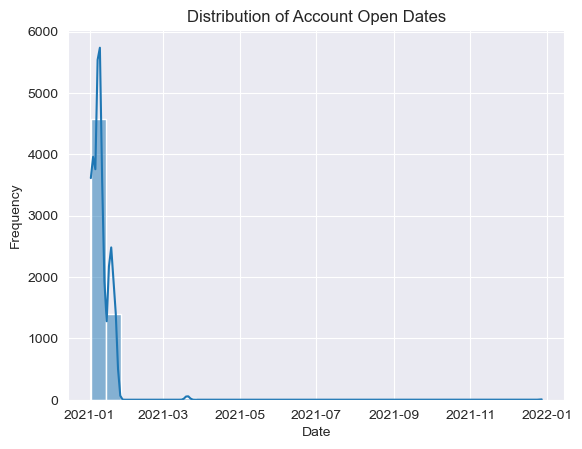

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Banking_Transactions_Final['Account Open Date'] = pd.to_datetime(Banking_Transactions_Final['Account Open Date'])
sns.histplot(Banking_Transactions_Final['Account Open Date'], bins=30, kde=True)
plt.title('Distribution of Account Open Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


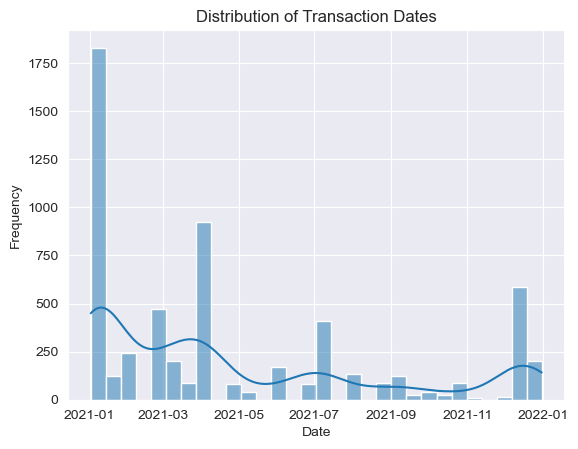

In [35]:
Banking_Transactions_Final['Transaction on Date'] = pd.to_datetime(Banking_Transactions_Final['Transaction on Date'])
sns.histplot(Banking_Transactions_Final['Transaction on Date'], bins=30, kde=True)
plt.title('Distribution of Transaction Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()


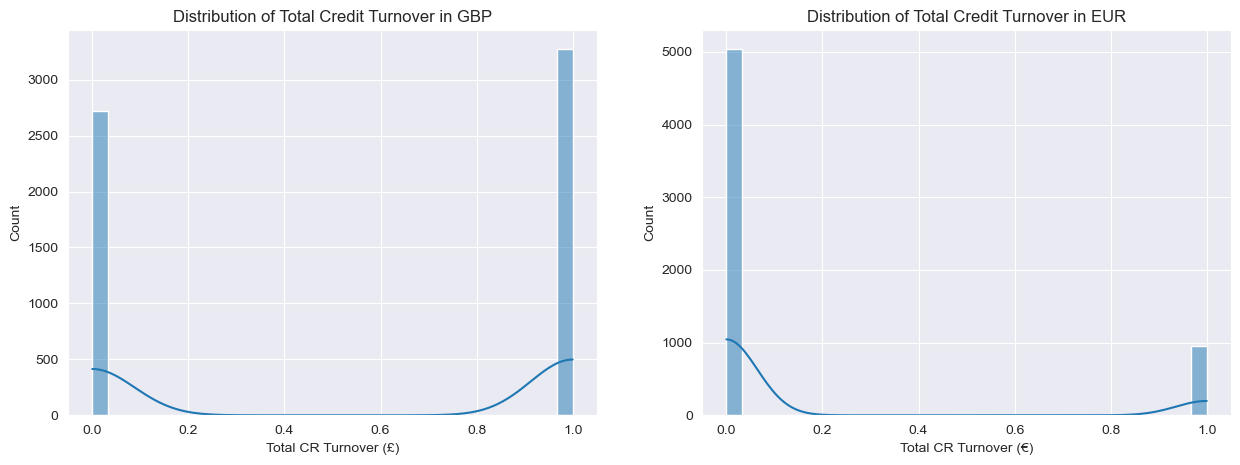

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(Banking_Transactions_Final['Total CR Turnover_£'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total Credit Turnover in GBP')
axes[0].set_xlabel('Total CR Turnover (£)')

sns.histplot(Banking_Transactions_Final['Total CR Turnover_€'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Total Credit Turnover in EUR')
axes[1].set_xlabel('Total CR Turnover (€)')

plt.show()


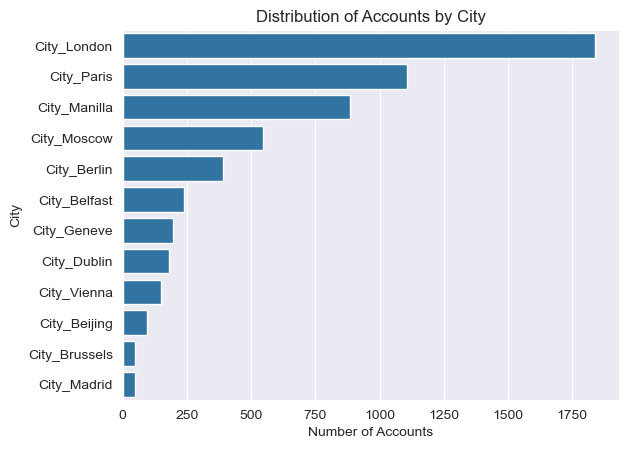

In [37]:
city_columns = [col for col in Banking_Transactions_Final.columns if col.startswith('City_')]
city_counts = Banking_Transactions_Final[city_columns].sum().sort_values(ascending=False)

sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Distribution of Accounts by City')
plt.xlabel('Number of Accounts')
plt.ylabel('City')
plt.show()


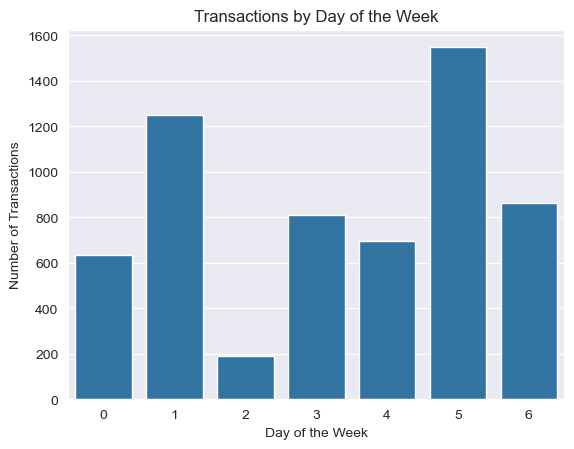

In [38]:
sns.countplot(x='Day_of_Week', data=Banking_Transactions_Final)
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()


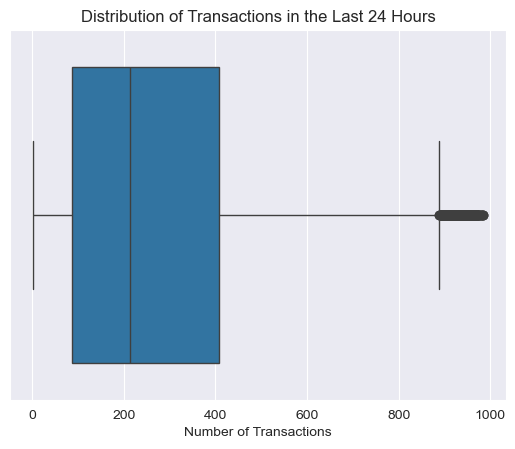

In [39]:
sns.boxplot(x=Banking_Transactions_Final['Transactions_last_24h'])
plt.title('Distribution of Transactions in the Last 24 Hours')
plt.xlabel('Number of Transactions')
plt.show()


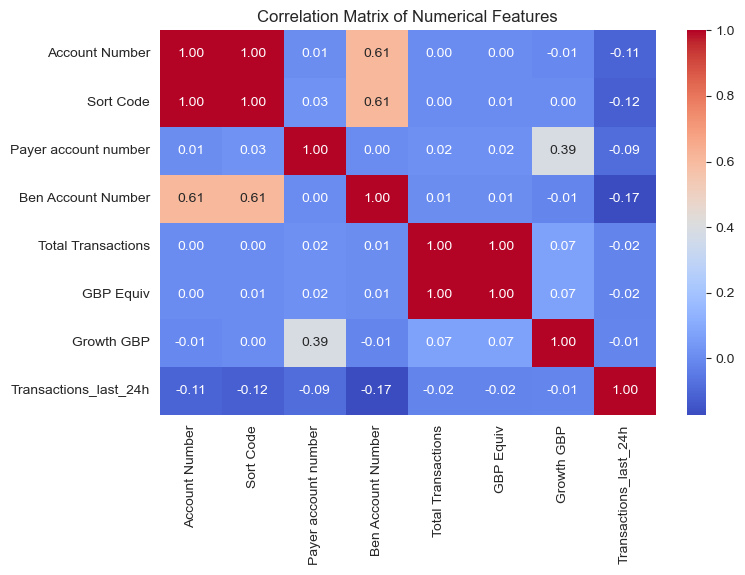

In [40]:
numerical_columns = Banking_Transactions_Final.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = Banking_Transactions_Final[numerical_columns].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


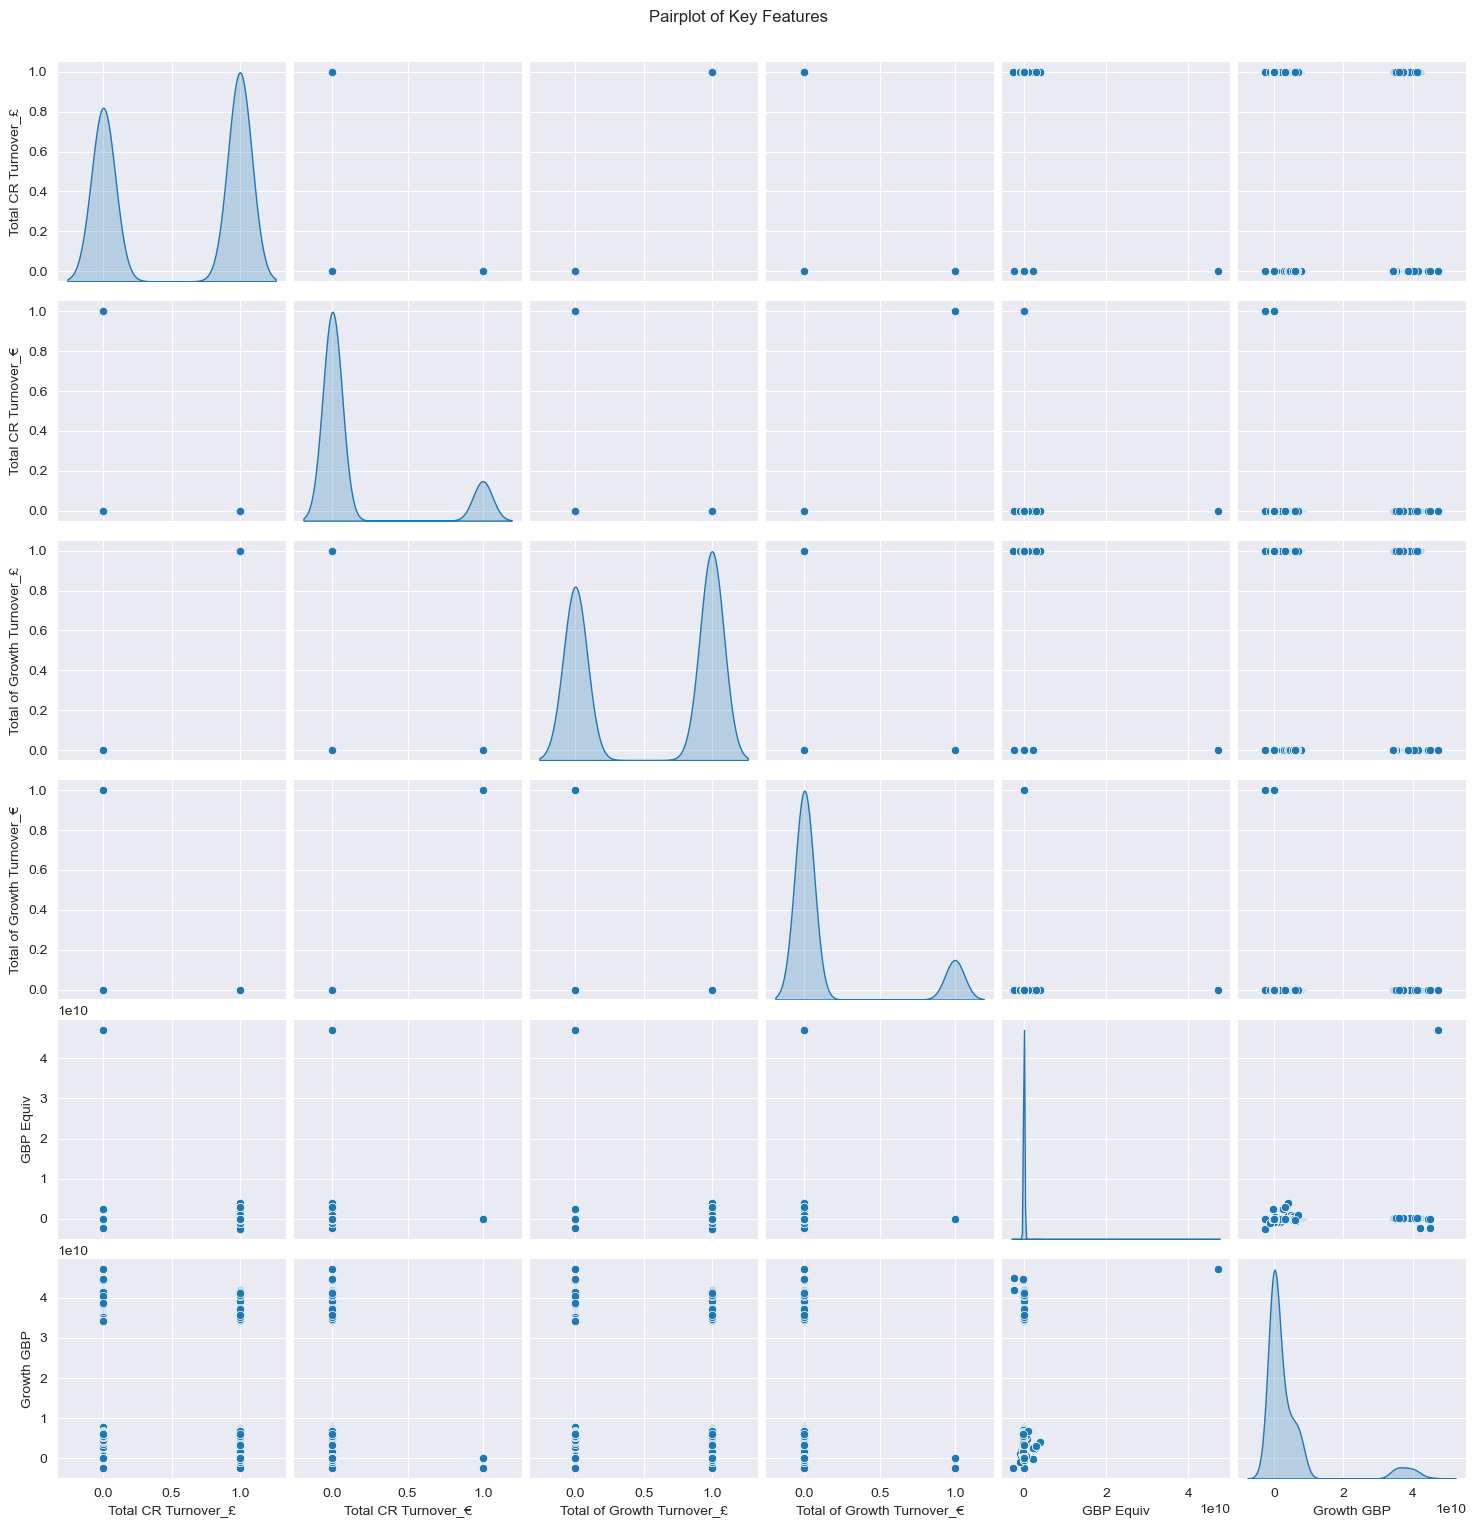

In [41]:
key_features = ['Total CR Turnover_£', 'Total CR Turnover_€', 'Total of Growth Turnover_£', 'Total of Growth Turnover_€', 'GBP Equiv', 'Growth GBP']
sns.pairplot(Banking_Transactions_Final[key_features], diag_kind='kde')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


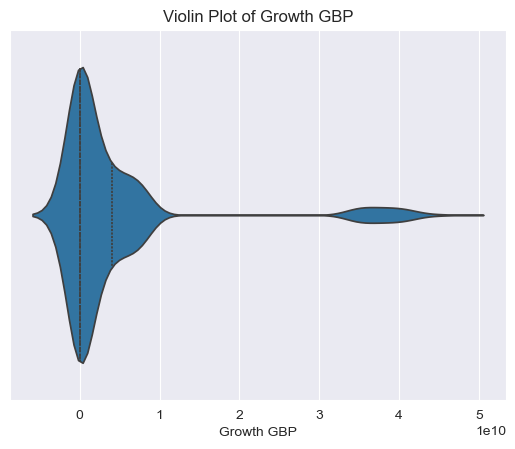

In [42]:
sns.violinplot(x='Growth GBP', data=Banking_Transactions_Final, inner='quartile')
plt.title('Violin Plot of Growth GBP')
plt.xlabel('Growth GBP')
plt.show()


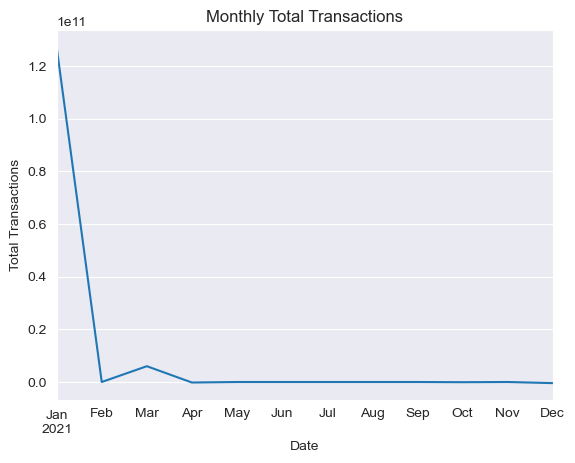

In [43]:
Banking_Transactions_Final.set_index('Transaction on Date', inplace=True)
Banking_Transactions_Final['Total Transactions'].resample('M').sum().plot()
plt.title('Monthly Total Transactions')
plt.xlabel('Date')
plt.ylabel('Total Transactions')
plt.show()


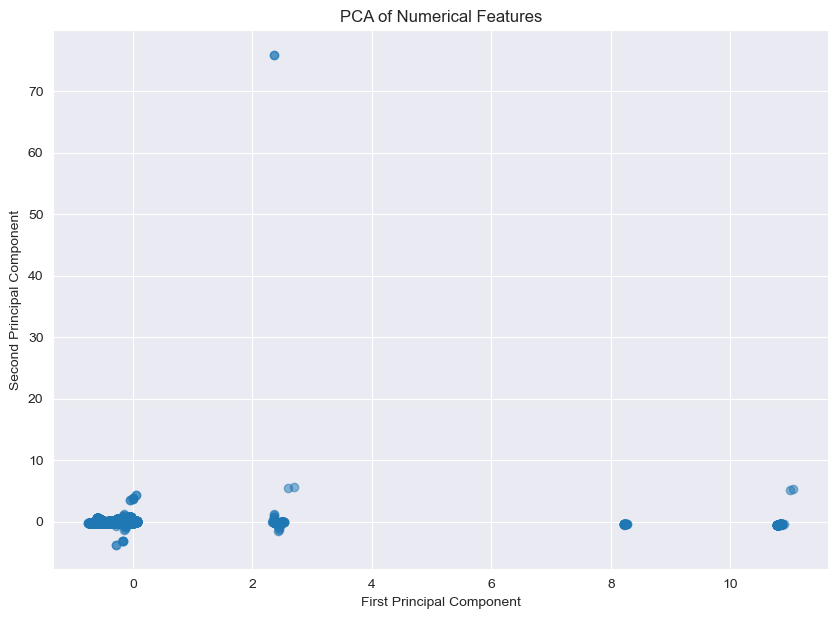

In [44]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Banking_Transactions_Final[numerical_columns].dropna())

# Applying PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 7))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.title('PCA of Numerical Features')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


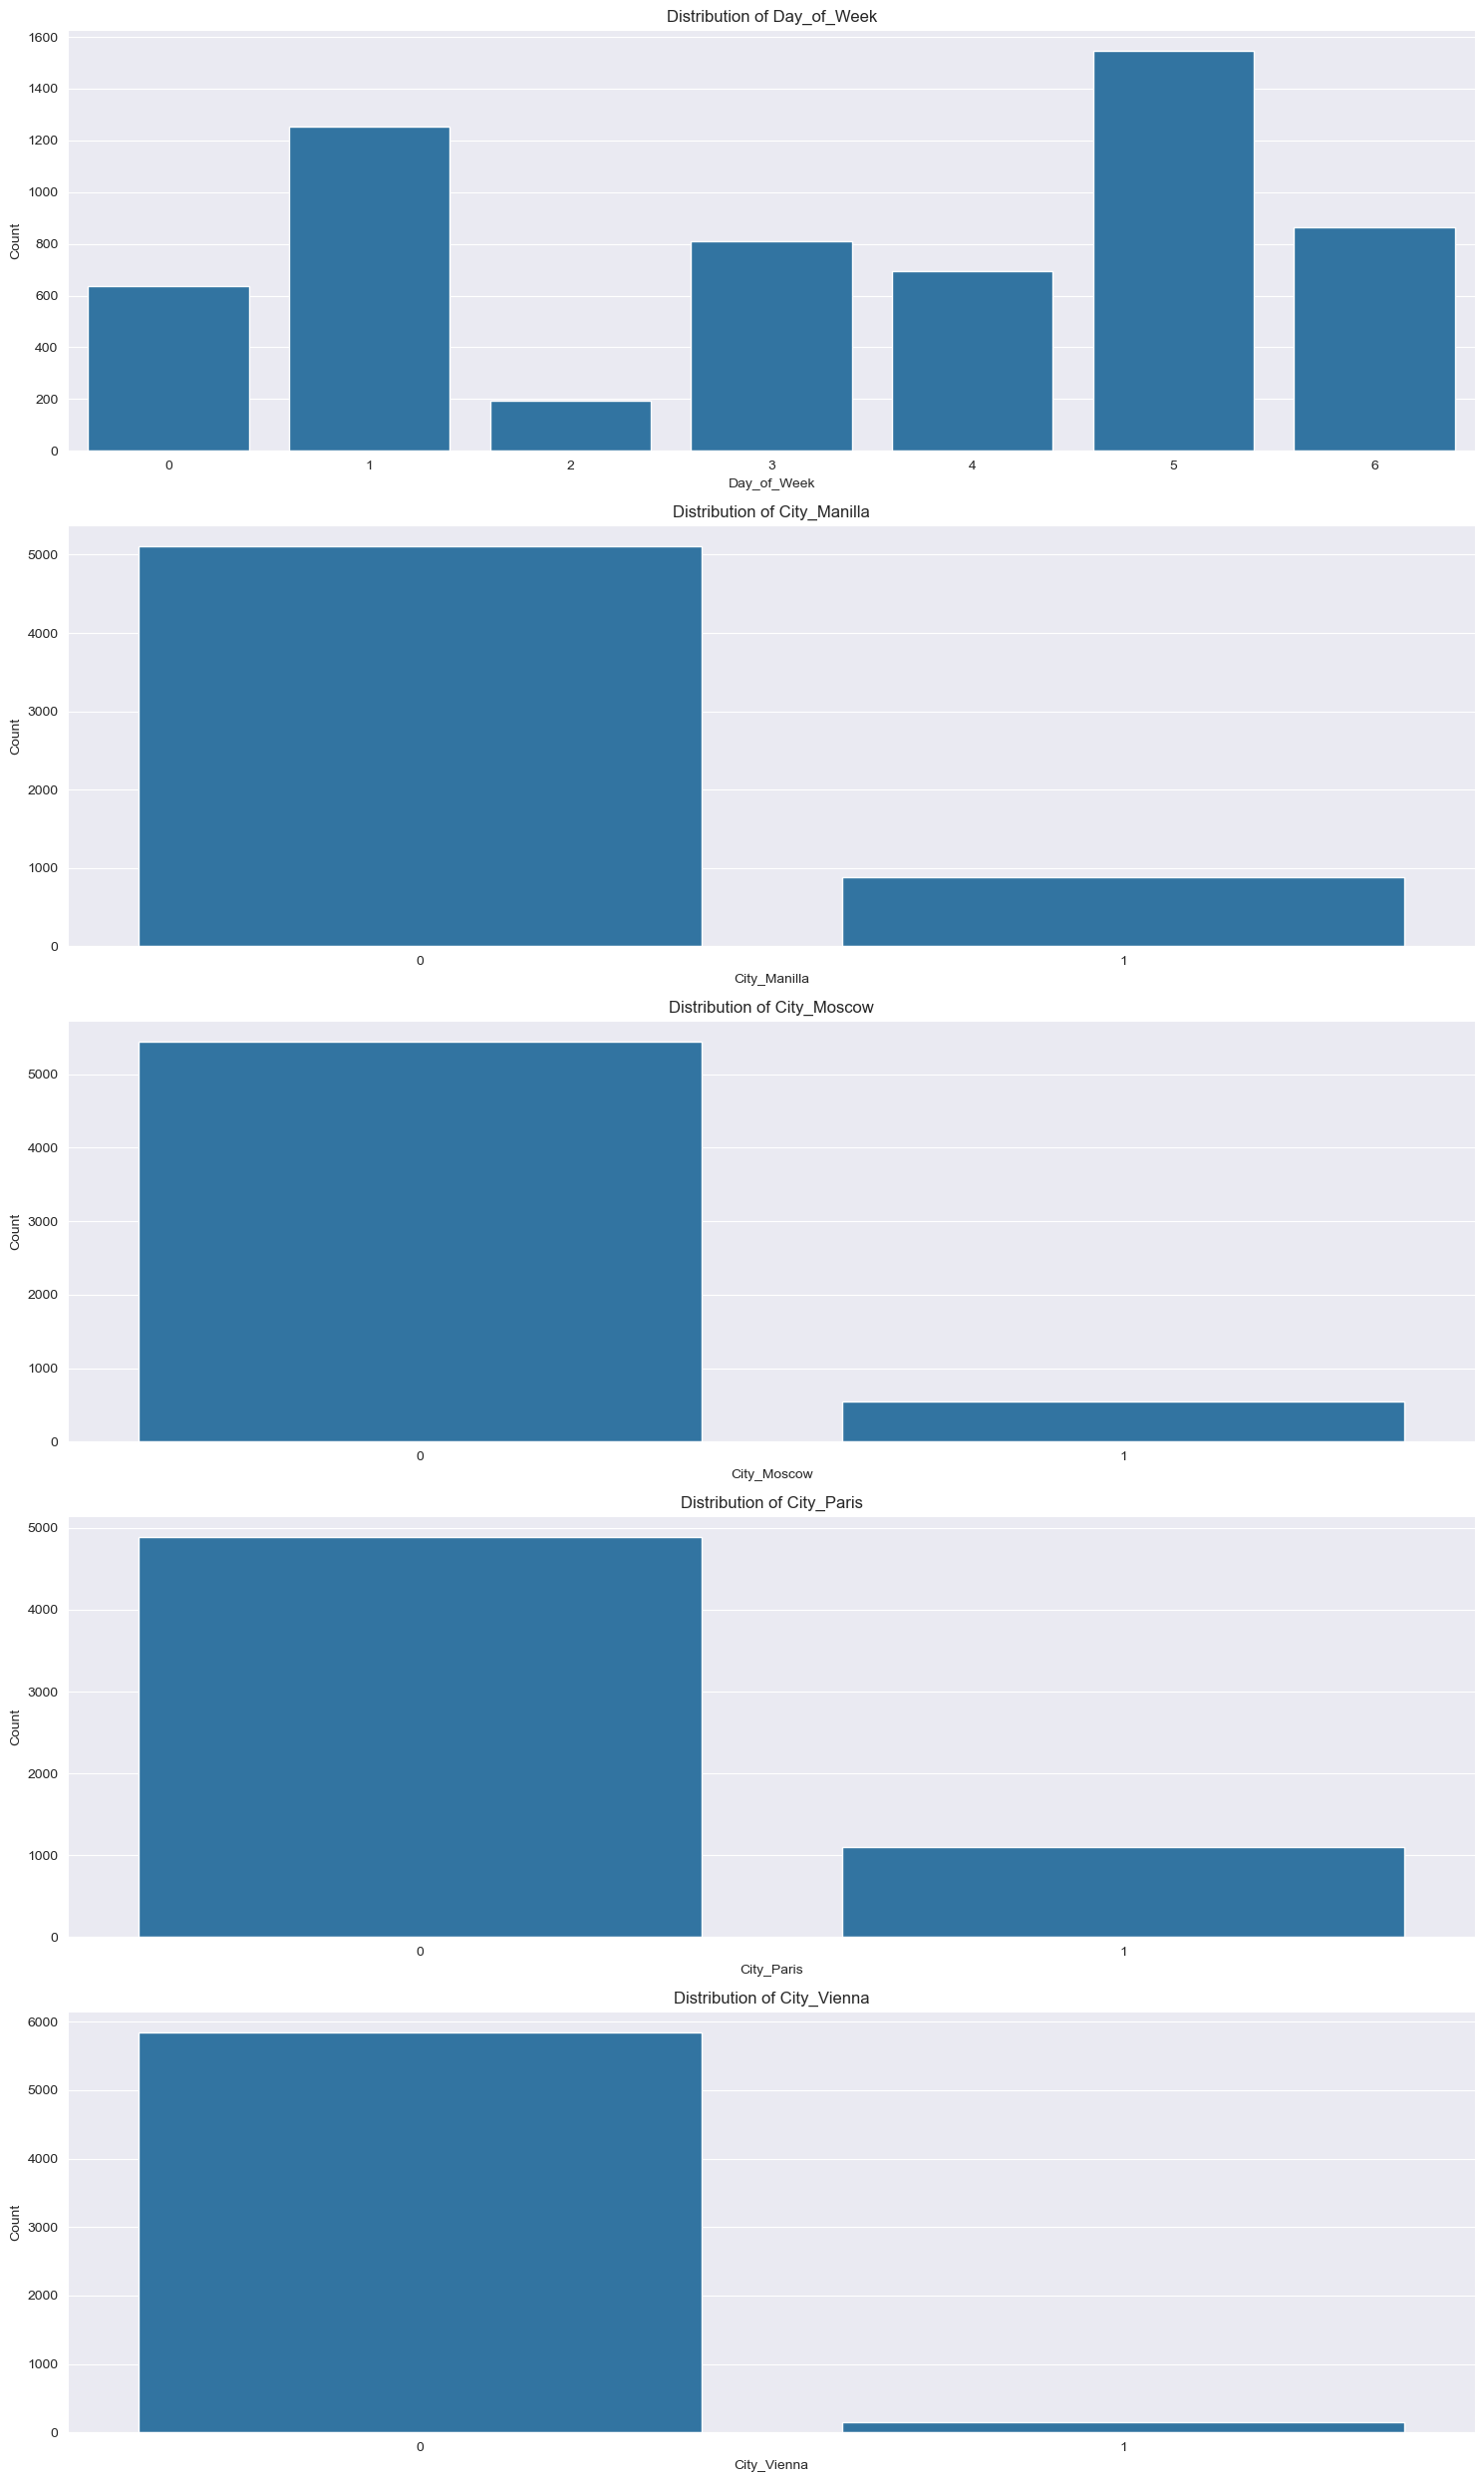

In [45]:
categorical_columns = ['Day_of_Week', 'City_Manilla', 'City_Moscow', 'City_Paris', 'City_Vienna']
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 5*len(categorical_columns)))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=Banking_Transactions_Final, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


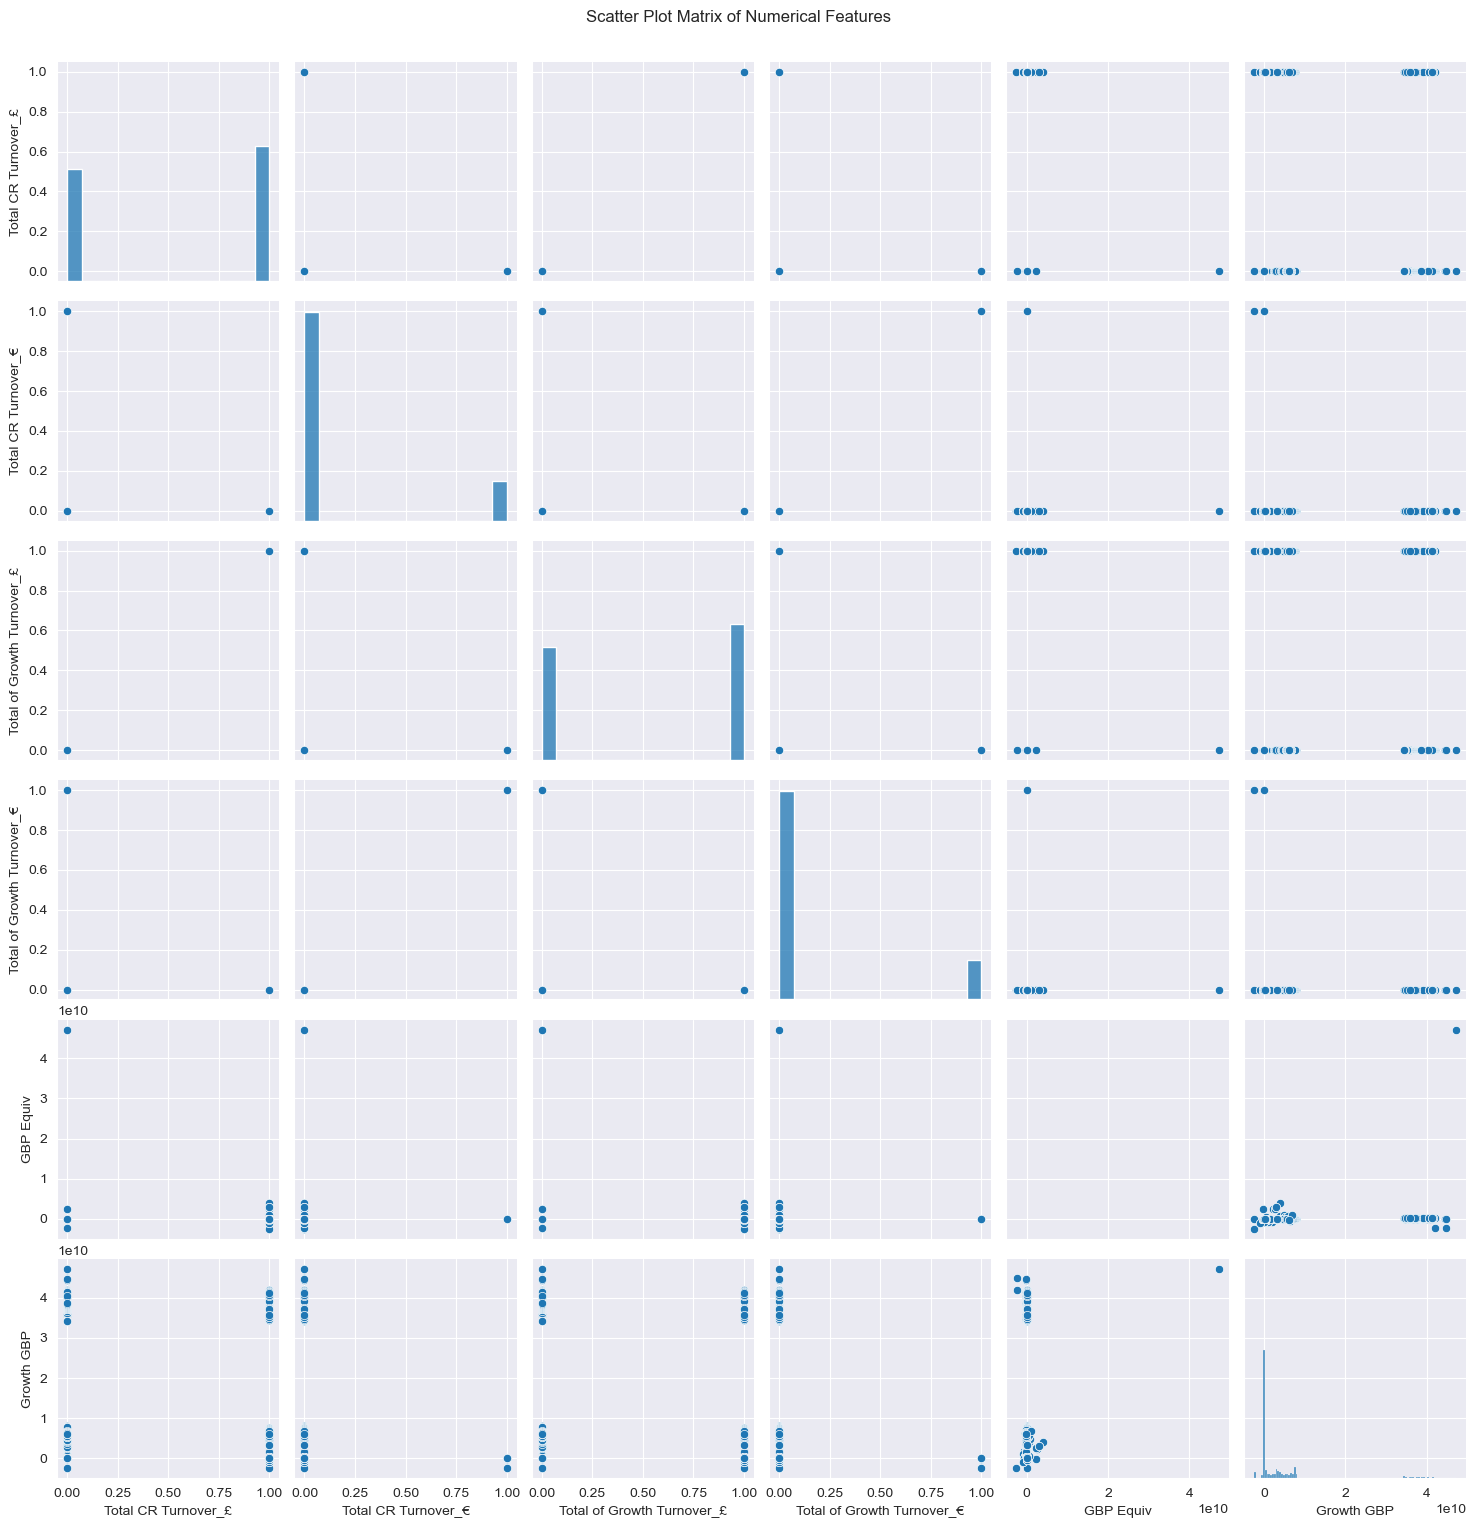

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Total CR Turnover_£', 'Total CR Turnover_€', 'Total of Growth Turnover_£', 'Total of Growth Turnover_€', 'GBP Equiv', 'Growth GBP']
sns.pairplot(Banking_Transactions_Final[numerical_columns])
plt.suptitle('Scatter Plot Matrix of Numerical Features', y=1.02)
plt.show()


In [47]:
# Checking for NaN and infinite values in the entire dataset
nan_counts = Banking_Transactions_Final.isna().sum()
inf_counts = Banking_Transactions_Final.applymap(lambda x: isinstance(x, float) and np.isinf(x)).sum()

nan_counts_nonzero = nan_counts[nan_counts > 0]
inf_counts_nonzero = inf_counts[inf_counts > 0]

nan_counts_nonzero, inf_counts_nonzero

(Series([], dtype: int64), Series([], dtype: int64))

## 4 Autoencoder Neural Network Implementation

Columns dropped: Index([], dtype='object')
NaN counts after dropping problematic columns:
Series([], dtype: int64)
Inf counts after dropping problematic columns:
Series([], dtype: int64)
Data successfully converted to NumPy array.
Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2267 - val_loss: 0.0256
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0099 - val_loss: 0.0073
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2483s 8s/step - loss: 0.0048 - val_loss: 0.0060
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0044 - val_loss: 0.0055
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0043 - val_loss: 0.0051
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0043

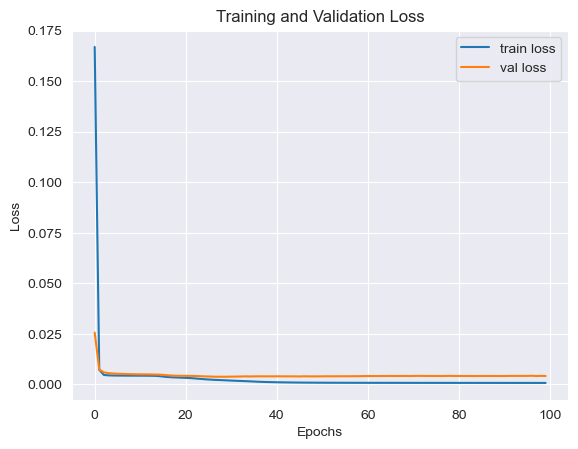

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Number of anomalies detected: 300


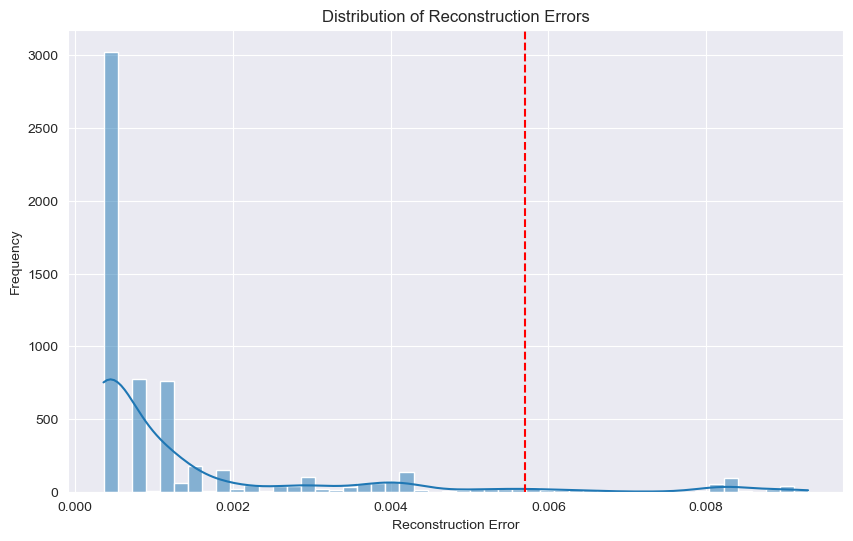

In [48]:
# Drop columns with NaN values
columns_to_drop = nan_counts_nonzero.index
Banking_Transactions_Final.drop(columns=columns_to_drop, inplace=True)
print("Columns dropped:", columns_to_drop)

# Check for any remaining NaN or Inf values after dropping columns
nan_counts_after_dropping = Banking_Transactions_Final.isna().sum()
inf_counts_after_dropping = Banking_Transactions_Final.applymap(lambda x: isinstance(x, float) and np.isinf(x)).sum()

nan_counts_nonzero_after_dropping = nan_counts_after_dropping[nan_counts_after_dropping > 0]
inf_counts_nonzero_after_dropping = inf_counts_after_dropping[inf_counts_after_dropping > 0]

print("NaN counts after dropping problematic columns:")
print(nan_counts_nonzero_after_dropping)
print("Inf counts after dropping problematic columns:")
print(inf_counts_nonzero_after_dropping)

# If no NaN or Inf values are present, convert to a NumPy array and proceed with training
if nan_counts_nonzero_after_dropping.empty and inf_counts_nonzero_after_dropping.empty:
    # Ensure all columns are numerical
    numerical_df = Banking_Transactions_Final.select_dtypes(include=[np.number])

    # Convert the DataFrame to a NumPy array
    data = numerical_df.values.astype(np.float32)
    print("Data successfully converted to NumPy array.")
    
    # Normalize the data
    scaler = MinMaxScaler()
    data = scaler.fit_transform(data)

    # Define the autoencoder model
    input_dim = data.shape[1]
    encoding_dim = 40  

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(encoding_dim // 2, activation="relu")(encoder)
    encoder = Dense(encoding_dim // 4, activation="relu")(encoder)
    decoder = Dense(encoding_dim // 2, activation='relu')(encoder)
    decoder = Dense(encoding_dim, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    # Train the autoencoder
    history = autoencoder.fit(data, data, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

    # Plot training history
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Use the autoencoder to reconstruct the data
    reconstructed_data = autoencoder.predict(data)

    # Calculate reconstruction error
    reconstruction_error = np.mean(np.power(data - reconstructed_data, 2), axis=1)

    # Set a threshold for anomaly detection
    threshold = np.percentile(reconstruction_error, 95)

    # Identify anomalies
    anomalies = reconstruction_error > threshold

    # Print out the number of anomalies detected
    print(f"Number of anomalies detected: {np.sum(anomalies)}")

    # Visualize the distribution 
    plt.figure(figsize=(10, 6))
    sns.histplot(reconstruction_error, bins=50, kde=True)
    plt.axvline(threshold, color='r', linestyle='--')
    plt.title('Distribution of Reconstruction Errors')
    plt.xlabel('Reconstruction Error')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Data still contains NaN or Inf values. Further cleaning needed.")

In [49]:
# Calculate reconstruction error for each feature
reconstruction_error_matrix_autoencoder = np.abs(data - reconstructed_data)

# Calculate total reconstruction error for each sample
total_reconstruction_error_autoencoder = np.sum(reconstruction_error_matrix_autoencoder, axis=1)

# Calculate the contribution percentage for each feature
contribution_percentage_autoencoder = (reconstruction_error_matrix_autoencoder.T / total_reconstruction_error_autoencoder).T * 100


In [52]:
# Add the anomaly labels to the original data
Banking_Transactions_Final['Anomaly'] = anomalies

# Separate the anomalies from the normal transactions
anomalous_data = Banking_Transactions_Final[Banking_Transactions_Final['Anomaly'] == True]
normal_data = Banking_Transactions_Final[Banking_Transactions_Final['Anomaly'] == False]

# Print the anomalous transactions
print("Anomalous transactions:")
print(anomalous_data)

# Separate the anomalies from the normal transactions
anomalous_data = Banking_Transactions_Final[Banking_Transactions_Final['Anomaly'] == True]

# Save the anomalous transactions to a CSV file
anomalous_data.to_csv('C:/Users/lmenon/Documents/mnt/data/anomalous_transactions.csv', index=False)


Anomalous transactions:
                    Account Open Date  Account Number  Sort Code  \
Transaction on Date                                                
2021-09-10                 2021-01-13        12385677     126894   
2021-09-10                 2021-01-13        12385677     126894   
2021-09-10                 2021-01-13        12385677     126894   
2021-09-10                 2021-01-13        12385677     126894   
2021-09-10                 2021-01-13        12385677     126894   
...                               ...             ...        ...   
2021-12-28                 2021-01-21        12385338     124379   
2021-12-28                 2021-01-21        12385338     124379   
2021-12-28                 2021-01-21        12385338     124379   
2021-12-28                 2021-01-21        12385338     124379   
2021-12-28                 2021-01-21        12385338     124379   

                     Payer account number  Ben Account Number  \
Transaction on Date       

In [53]:
# Print model summary
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2788)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │       111,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2788)           │       114,308 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,876 (2.61 MB)

 Trainable params: 227,958 (890.46 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 455,918 (1.74 MB)

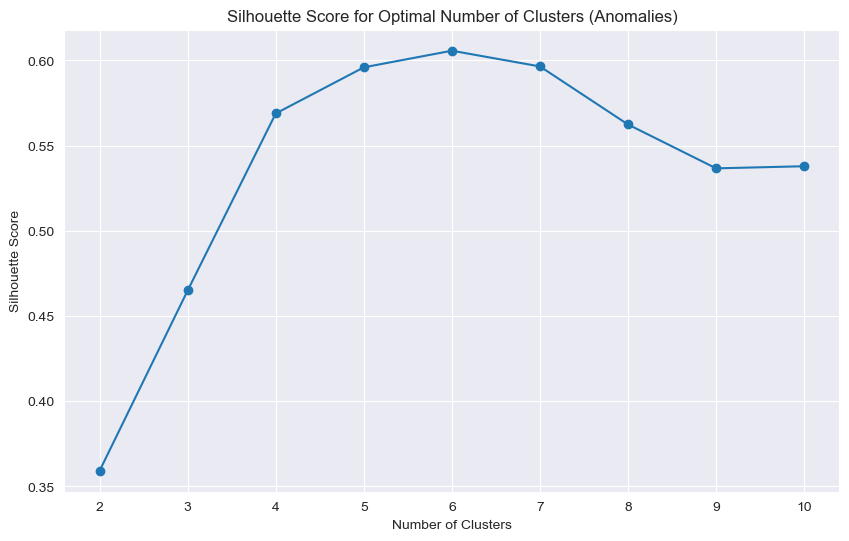

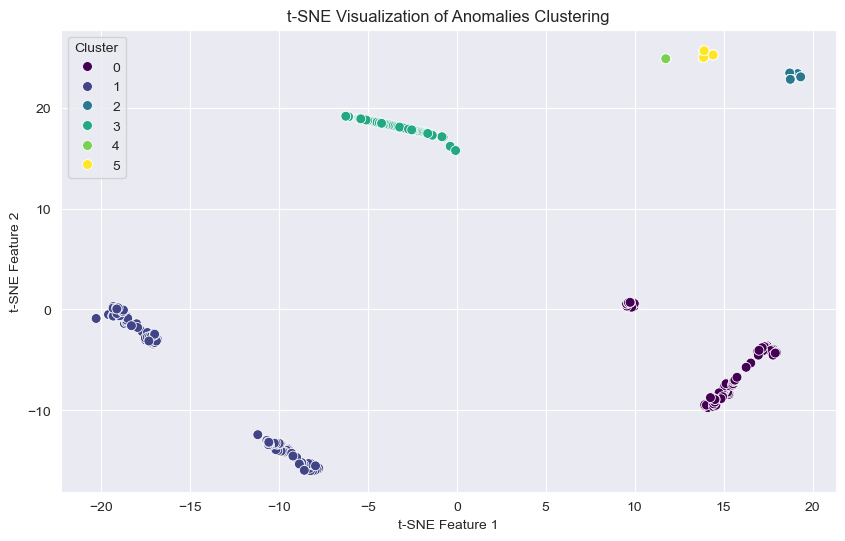

                                                Feature    Importance
2633                Payer account name_Deutsche Bank AG  6.266667e-01
2720                Ben Account Name_Sberbank of Russia  5.533333e-01
2696               Account Bank Name_Sberbank of Russia  5.533333e-01
131    Transaction Type_Money Received by Bank Transfer  5.166667e-01
2765                                Country_Philippines  5.146854e-01
...                                                 ...           ...
307                          Growth GBP_(2,519,429,964)  3.410414e-22
1871                          Growth GBP_44,813,100,000  3.024087e-22
1503                                 Growth GBP_343,400  8.535217e-23
14                  Account Name_British Petroleum (BP)  1.130433e-23
121   Transaction Type_Kerozene Bill AV GAS 500 paid...  6.086379e-25

[2788 rows x 2 columns]


In [54]:
# Clustering on the anomaly data
anomaly_data = data[anomalies]

# Normalize the anomaly data
scaler = MinMaxScaler()
anomaly_data_normalized = scaler.fit_transform(anomaly_data)

# Determine the optimal number of clusters using the silhouette score for anomalies
silhouette_scores_anomalies = []
for i in range(2, 11):
    kmeans_anomalies = KMeans(n_clusters=i, random_state=42)
    kmeans_anomalies.fit(anomaly_data_normalized)
    score_anomalies = silhouette_score(anomaly_data_normalized, kmeans_anomalies.labels_)
    silhouette_scores_anomalies.append(score_anomalies)

# Plot the silhouette scores for anomalies
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores_anomalies, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters (Anomalies)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Train the K-means model with the optimal number of clusters for anomalies
optimal_clusters_anomalies = np.argmax(silhouette_scores_anomalies) + 2  
kmeans_anomalies = KMeans(n_clusters=optimal_clusters_anomalies, random_state=42)
kmeans_anomalies.fit(anomaly_data_normalized)
anomaly_labels = kmeans_anomalies.labels_

# t-SNE Visualization for anomalies
tsne_anomalies = TSNE(n_components=2, random_state=42)
tsne_results_anomalies = tsne_anomalies.fit_transform(anomaly_data_normalized)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results_anomalies[:, 0], y=tsne_results_anomalies[:, 1], hue=anomaly_labels, palette='viridis', s=50)
plt.title('t-SNE Visualization of Anomalies Clustering')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Cluster')
plt.show()


# Adding anomaly labels to the original data for further analysis
Banking_Transactions_Final['Anomaly'] = 0
Banking_Transactions_Final.loc[anomalies, 'Anomaly'] = anomaly_labels + 1 

# Analyze feature importance
feature_importance = pd.DataFrame({
    'Feature': numerical_df.columns,
    'Importance': np.mean(np.abs(data[anomalies] - reconstructed_data[anomalies]), axis=0)
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance)



## 4.1 Hyperparameter Tuning and Regularization with rule based anomalies

Epoch 1/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.2494 - val_loss: 0.2472
Epoch 2/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2441 - val_loss: 0.2310
Epoch 3/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2160 - val_loss: 0.1733
Epoch 4/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1396 - val_loss: 0.0825
Epoch 5/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0560 - val_loss: 0.0332
Epoch 6/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0210 - val_loss: 0.0171
Epoch 7/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0108 - val_loss: 0.0114
Epoch 8/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0075 - val_loss: 0.0088
Epoch 9/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0062 - val_loss: 0.0074
Epoch 10/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0054 - val_loss: 0.0066
Epoch 11/200
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0051 - val_loss: 0.0061
Epoch 12/200
300/300 ━━━━━━━━━

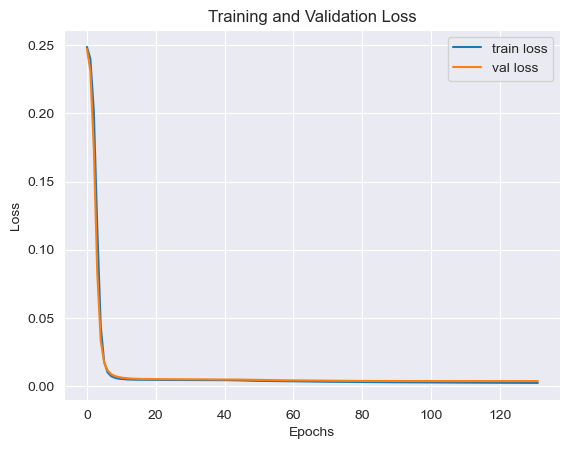

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Number of anomalies detected: 300


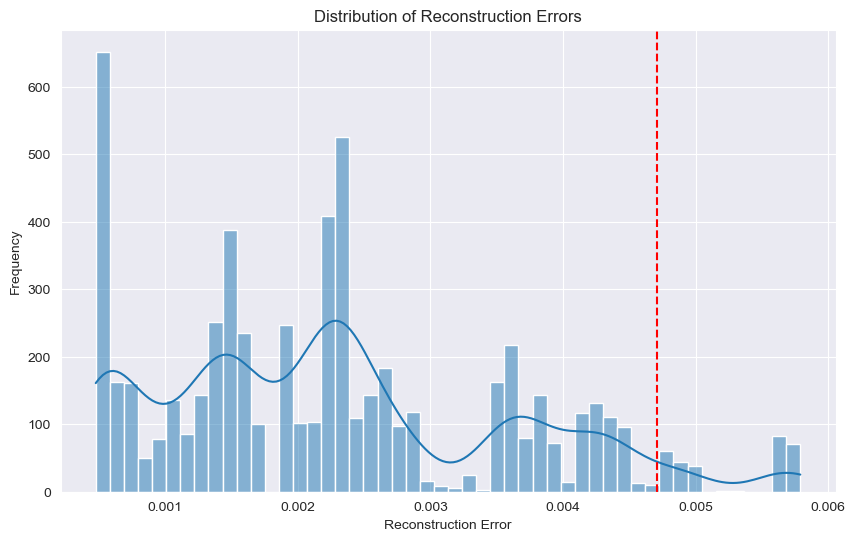

Number of rule-based anomalies detected: 1687
Number of rule-based anomalies detected: 1687
Number of autoencoder-based anomalies detected: 300
Total number of anomalies detected: 1865


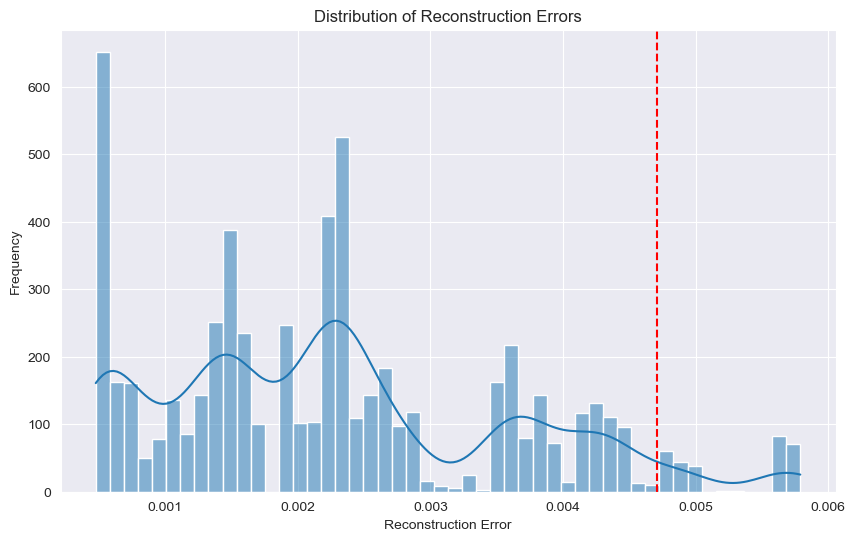

In [55]:
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define the autoencoder model
input_dim = data.shape[1]
encoding_dim = 100

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dropout(0.2)(encoder)
encoder = Dense(encoding_dim // 2, activation="relu")(encoder)
encoder = Dropout(0.2)(encoder)
encoder = Dense(encoding_dim // 4, activation="relu")(encoder)
decoder = Dense(encoding_dim // 2, activation='relu')(encoder)
decoder = Dropout(0.2)(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the autoencoder
history = autoencoder.fit(data, data, epochs=200, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Use the autoencoder to reconstruct the data
reconstructed_data = autoencoder.predict(data)

# Calculate reconstruction error
reconstruction_error = np.mean(np.power(data - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)

# Identify anomalies
anomalies = reconstruction_error > threshold

# Print out the number of anomalies detected
print(f"Number of anomalies detected: {np.sum(anomalies)}")

# Visualize the distribution of reconstruction errors
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Rule-based anomaly detection
Banking_Transactions_Final['Conditions_Met'] = (
    Banking_Transactions_Final['Is_high_amount'].astype(int) +
    Banking_Transactions_Final['Is_cross_border'].astype(int) +
    Banking_Transactions_Final['Is_round_amount'].astype(int) +
    Banking_Transactions_Final['Is_out_of_hours'].astype(int) +
    Banking_Transactions_Final['Is_weekend'].astype(int) +
    Banking_Transactions_Final['Flag'].isin(['Grey_listed', 'Black_listed']).astype(int) +
    (~Banking_Transactions_Final['Is_same_currency']).astype(int)
)

# Add the condition for 'Flagged Individual' if the column exists and is numeric
if 'Flagged Individual' in Banking_Transactions_Final.columns:
    if Banking_Transactions_Final['Flagged Individual'].dtype == 'bool':
        Banking_Transactions_Final['Conditions_Met'] += Banking_Transactions_Final['Flagged Individual'].astype(int)
    else:
        # Handle non-numeric 'Flagged Individual' appropriately
        Banking_Transactions_Final['Conditions_Met'] += (Banking_Transactions_Final['Flagged Individual'] == 'Flagged').astype(int)

# Add the condition for 'Transaction type exceeding regular limits' if the column exists
if 'Transaction type exceeding regular limits' in Banking_Transactions_Final.columns:
    Banking_Transactions_Final['Conditions_Met'] += Banking_Transactions_Final['Transaction type exceeding regular limits'].isin(['Requires Further Verification']).astype(int)

# Transactions_last_24h anomaly detection (using a quantile-based threshold)
threshold_24h = Banking_Transactions_Final['Transactions_last_24h'].quantile(0.95)
Banking_Transactions_Final['Conditions_Met'] += (Banking_Transactions_Final['Transactions_last_24h'] > threshold_24h).astype(int)

# Mark rule-based anomalies if 5 or more conditions are met
Banking_Transactions_Final['Is_rule_based_anomaly'] = Banking_Transactions_Final['Conditions_Met'] >= 5

# Drop the auxiliary column if not needed
Banking_Transactions_Final = Banking_Transactions_Final.drop(columns=['Conditions_Met'])

# Print out the number of anomalies detected
print(f"Number of rule-based anomalies detected: {Banking_Transactions_Final['Is_rule_based_anomaly'].sum()}")

# Combine both types of anomalies
Banking_Transactions_Final['Is_autoencoder_anomaly'] = anomalies
Banking_Transactions_Final['Is_anomaly'] = Banking_Transactions_Final['Is_rule_based_anomaly'] | Banking_Transactions_Final['Is_autoencoder_anomaly']

# Print out the number of anomalies detected
print(f"Number of rule-based anomalies detected: {Banking_Transactions_Final['Is_rule_based_anomaly'].sum()}")
print(f"Number of autoencoder-based anomalies detected: {np.sum(anomalies)}")
print(f"Total number of anomalies detected: {Banking_Transactions_Final['Is_anomaly'].sum()}")

# Visualize the distribution of reconstruction errors
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()


In [56]:
# Initialize a new column for feature contributions
Banking_Transactions_Final['Feature_Contribution_Rule_Based'] = [{} for _ in range(len(Banking_Transactions_Final))]

# List of features to consider for rule-based anomaly detection
rule_based_features = [
    'Is_high_amount',
    'Is_cross_border',
    'Is_round_amount',
    'Is_out_of_hours',
    'Is_weekend',
    'Flag',
    'Is_same_currency',
    'Flagged Individual',
    'Transaction type exceeding regular limits',
    'Transactions_last_24h'
]

# Function to calculate contributions for rule-based anomalies
def calculate_rule_based_contributions(row):
    contributions = {}
    if row['Is_rule_based_anomaly']:
        contributions['Is_high_amount'] = int(row['Is_high_amount'])
        contributions['Is_cross_border'] = int(row['Is_cross_border'])
        contributions['Is_round_amount'] = int(row['Is_round_amount'])
        contributions['Is_out_of_hours'] = int(row['Is_out_of_hours'])
        contributions['Is_weekend'] = int(row['Is_weekend'])
        contributions['Flag'] = int(row['Flag'] in ['Grey_listed', 'Black_listed'])
        contributions['Is_same_currency'] = int(not row['Is_same_currency'])
        
        if 'Flagged Individual' in row.index:
            if row['Flagged Individual'] == 'Flagged' or row['Flagged Individual'] is True:
                contributions['Flagged Individual'] = 1
            else:
                contributions['Flagged Individual'] = 0

        if 'Transaction type exceeding regular limits' in row.index:
            contributions['Transaction type exceeding regular limits'] = int(row['Transaction type exceeding regular limits'] == 'Requires Further Verification')
        
        contributions['Transactions_last_24h'] = int(row['Transactions_last_24h'] > threshold_24h)
        
        # Calculate percentage contribution
        total_conditions = sum(contributions.values())
        if total_conditions > 0:
            for feature in contributions:
                contributions[feature] = (contributions[feature] / total_conditions) * 100
    return contributions

# Apply the function to each row
Banking_Transactions_Final['Feature_Contribution_Rule_Based'] = Banking_Transactions_Final.apply(calculate_rule_based_contributions, axis=1)

# Display the rule-based anomalies with feature contributions
print("Rule-based anomalies with feature contributions (first few rows):")
print(Banking_Transactions_Final[['Feature_Contribution_Rule_Based']].head())


Rule-based anomalies with feature contributions (first few rows):
                                       Feature_Contribution_Rule_Based
Transaction on Date                                                   
2021-01-02           {'Is_high_amount': 20.0, 'Is_cross_border': 0....
2021-01-02           {'Is_high_amount': 20.0, 'Is_cross_border': 0....
2021-01-02           {'Is_high_amount': 20.0, 'Is_cross_border': 0....
2021-01-02           {'Is_high_amount': 20.0, 'Is_cross_border': 0....
2021-01-02           {'Is_high_amount': 20.0, 'Is_cross_border': 0....


## 5 Variational Autoencoder Model

In [57]:
# Add the conditions for rule-based anomalies
Banking_Transactions_Final['Conditions_Met'] = (
    Banking_Transactions_Final['Is_high_amount'].astype(int) +
    Banking_Transactions_Final['Is_cross_border'].astype(int) +
    Banking_Transactions_Final['Is_round_amount'].astype(int) +
    Banking_Transactions_Final['Is_out_of_hours'].astype(int) +
    Banking_Transactions_Final['Is_weekend'].astype(int) +
    Banking_Transactions_Final['Flag'].isin(['Grey_listed', 'Black_listed']).astype(int) +
    (~Banking_Transactions_Final['Is_same_currency']).astype(int)
)

# Add the condition for 'Flagged Individual' if the column exists and is numeric
if 'Flagged Individual' in Banking_Transactions_Final.columns:
    if Banking_Transactions_Final['Flagged Individual'].dtype == 'bool':
        Banking_Transactions_Final['Conditions_Met'] += Banking_Transactions_Final['Flagged Individual'].astype(int)
    else:
        # Handle non-numeric 'Flagged Individual' appropriately
        Banking_Transactions_Final['Conditions_Met'] += (Banking_Transactions_Final['Flagged Individual'] == 'Flagged').astype(int)

# Add the condition for 'Transaction type exceeding regular limits' if the column exists
if 'Transaction type exceeding regular limits' in Banking_Transactions_Final.columns:
    Banking_Transactions_Final['Conditions_Met'] += Banking_Transactions_Final['Transaction type exceeding regular limits'].isin(['Requires Further Verification']).astype(int)

# Transactions_last_24h anomaly detection (using a quantile-based threshold)
threshold_24h = Banking_Transactions_Final['Transactions_last_24h'].quantile(0.95)
Banking_Transactions_Final['Conditions_Met'] += (Banking_Transactions_Final['Transactions_last_24h'] > threshold_24h).astype(int)

# Mark rule-based anomalies if 5 or more conditions are met
Banking_Transactions_Final['Is_rule_based_anomaly'] = Banking_Transactions_Final['Conditions_Met'] >= 5

# Verify that the column is created
print(Banking_Transactions_Final[['Conditions_Met', 'Is_rule_based_anomaly']].head())

# Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Banking_Transactions_Final.select_dtypes(include=[np.number]))


                     Conditions_Met  Is_rule_based_anomaly
Transaction on Date                                       
2021-01-02                        5                   True
2021-01-02                        5                   True
2021-01-02                        5                   True
2021-01-02                        5                   True
2021-01-02                        5                   True



Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - loss: 14.8774 - val_loss: 5.1144 - learning_rate: 5.0000e-04
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 4.4079 - val_loss: 4.5744 - learning_rate: 5.0000e-04
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3.8134 - val_loss: 4.2877 - learning_rate: 5.0000e-04
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.4726 - val_loss: 4.0165 - learning_rate: 5.0000e-04
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3.2234 - val_loss: 3.7956 - learning_rate: 5.0000e-04
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 3.0047 - val_loss: 3.5797 - learning_rate: 5.0000e-04
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.8020 - val_loss: 3.3828 - learning_rate: 5.0000e-04
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.6251 - val_loss: 3.1955 - learning_rate: 5.0000e-04
Epoch 9/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2.4801 

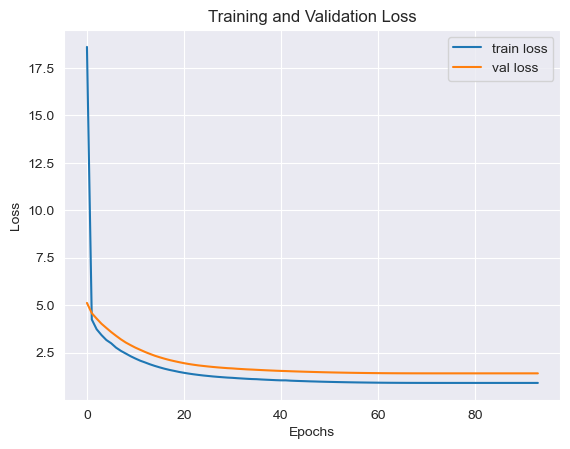

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Number of rule-based anomalies detected: 1687
Number of VAE-based anomalies detected: 300
Total number of anomalies detected: 1852


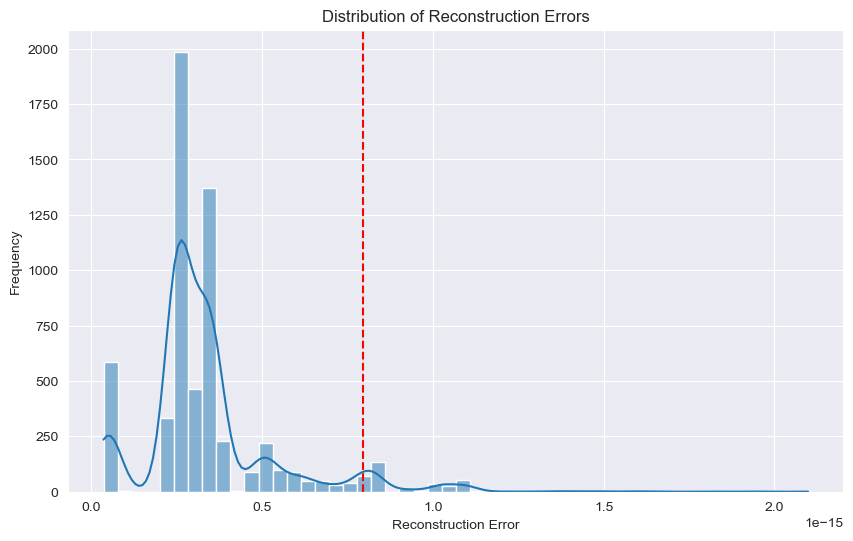

In [58]:
# Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Banking_Transactions_Final.select_dtypes(include=[np.number]))

# Define sampling function for VAE
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.random.normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Custom VAE loss layer
class VAELossLayer(Layer):
    def __init__(self, **kwargs):
        super(VAELossLayer, self).__init__(**kwargs)

    def call(self, inputs):
        x, x_decoded_mean, z_log_var, z_mean = inputs
        reconstruction_loss = tf.reduce_mean(tf.square(x - x_decoded_mean), axis=-1)
        kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        kl_loss = tf.reduce_sum(kl_loss, axis=-1)
        kl_loss *= -0.5
        loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        self.add_loss(loss)
        return x

# Define VAE model
input_dim = data_scaled.shape[1]
latent_dim = 2

inputs = Input(shape=(input_dim,))
h = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
h = Dropout(0.3)(h)
h = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(h)
h = Dropout(0.3)(h)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
decoder_h1 = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
decoder_h2 = Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))
decoder_mean = Dense(input_dim, activation='sigmoid')

h_decoded = decoder_h1(z)
h_decoded = Dropout(0.3)(h_decoded)
h_decoded = decoder_h2(h_decoded)
h_decoded = Dropout(0.3)(h_decoded)
x_decoded_mean = decoder_mean(h_decoded)

# Add custom loss layer
loss_layer = VAELossLayer()([inputs, x_decoded_mean, z_log_var, z_mean])

# Define VAE model
vae = Model(inputs=[inputs], outputs=[loss_layer])
vae.compile(optimizer=Adam(learning_rate=0.0005))

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the VAE
history = vae.fit(data_scaled, data_scaled, epochs=100, batch_size=16, validation_split=0.2, verbose=1, callbacks=[early_stopping, reduce_lr])

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Use the VAE to reconstruct the data
reconstructed_data = vae.predict(data_scaled)

# Calculate reconstruction error
reconstruction_error = np.mean(np.power(data_scaled - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)

# Identify VAE-based anomalies
vae_anomalies = reconstruction_error > threshold



# Combine all types of anomalies
Banking_Transactions_Final['Is_vae_anomaly'] = vae_anomalies
Banking_Transactions_Final['Is_anomaly'] = Banking_Transactions_Final['Is_rule_based_anomaly'] | Banking_Transactions_Final['Is_vae_anomaly']

# Print out the number of anomalies detected
print(f"Number of rule-based anomalies detected: {Banking_Transactions_Final['Is_rule_based_anomaly'].sum()}")
print(f"Number of VAE-based anomalies detected: {Banking_Transactions_Final['Is_vae_anomaly'].sum()}")
print(f"Total number of anomalies detected: {Banking_Transactions_Final['Is_anomaly'].sum()}")

# Visualize the distribution of reconstruction errors
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error, bins=50, kde=True)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()


In [59]:
# Calculate reconstruction error for each feature for VAE
reconstruction_error_matrix_vae = np.abs(data_scaled - reconstructed_data)

# Calculate total reconstruction error for VAE
total_reconstruction_error_vae = np.sum(reconstruction_error_matrix_vae, axis=1)

# Calculate the contribution percentage for each feature for VAE
contribution_percentage_vae = reconstruction_error_matrix_vae / total_reconstruction_error_vae[:, np.newaxis] * 100


In [61]:
# Print model summary
vae.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 2790)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 128)       │    357,248 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 128)       │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      8,256 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 64)        │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 2)         │        130 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 2)         │        130 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 2)         │          0 │ dense_14[0][0],   │
│                     │                   │            │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 64)        │        192 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 128)       │      8,320 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 128)       │          0 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 2790)      │    359,910 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vae_loss_layer      │ (None, 2790)      │          0 │ input_layer_2[0]… │
│ (VAELossLayer)      │                   │            │ dense_18[0][0],   │
│                     │                   │            │ dense_15[0][0],   │
│                     │                   │            │ dense_14[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,202,560 (8.40 MB)

 Trainable params: 734,186 (2.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,468,374 (5.60 MB)

## 6 Naive Bayes Model

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       851
        True       0.92      0.95      0.94       349

    accuracy                           0.96      1200
   macro avg       0.95      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



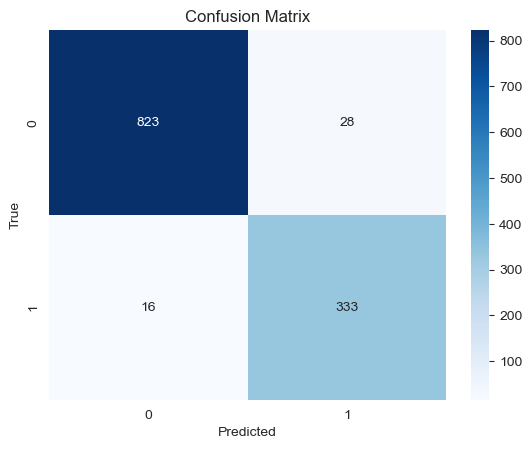

Number of rule-based anomalies detected: 1687
Number of Naive Bayes-based anomalies detected: 1749
Total number of anomalies detected: 1765


In [62]:
# Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Banking_Transactions_Final.select_dtypes(include=[np.number]))

# Handle categorical conversion for 'Flagged Individual' column
Banking_Transactions_Final['Flagged Individual'] = Banking_Transactions_Final['Flagged Individual'].map({'Flagged': 1, 'Regular': 0})

# Create the target variable based on the rule-based anomalies
Banking_Transactions_Final['Conditions_Met'] = (
    Banking_Transactions_Final['Is_high_amount'].astype(int) +
    Banking_Transactions_Final['Is_cross_border'].astype(int) +
    Banking_Transactions_Final['Is_round_amount'].astype(int) +
    Banking_Transactions_Final['Is_out_of_hours'].astype(int) +
    Banking_Transactions_Final['Is_weekend'].astype(int) +
    Banking_Transactions_Final['Flag'].isin(['Grey_listed', 'Black_listed']).astype(int) +
    (~Banking_Transactions_Final['Is_same_currency']).astype(int) +
    Banking_Transactions_Final['Flagged Individual'].astype(int) +
    Banking_Transactions_Final['Transaction type exceeding regular limits'].isin(['Requires Further Verification']).astype(int) +
    (Banking_Transactions_Final['Transactions_last_24h'] > Banking_Transactions_Final['Transactions_last_24h'].quantile(0.95)).astype(int)
)

# Mark rule-based anomalies if 5 or more conditions are met
Banking_Transactions_Final['Is_rule_based_anomaly'] = Banking_Transactions_Final['Conditions_Met'] >= 5

# Drop the auxiliary column if not needed
Banking_Transactions_Final = Banking_Transactions_Final.drop(columns=['Conditions_Met'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled, Banking_Transactions_Final['Is_rule_based_anomaly'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Combine all types of anomalies
Banking_Transactions_Final['Is_nb_anomaly'] = gnb.predict(data_scaled)
Banking_Transactions_Final['Is_anomaly'] = Banking_Transactions_Final['Is_rule_based_anomaly'] | Banking_Transactions_Final['Is_nb_anomaly']

# Print out the number of anomalies detected
print(f"Number of rule-based anomalies detected: {Banking_Transactions_Final['Is_rule_based_anomaly'].sum()}")
print(f"Number of Naive Bayes-based anomalies detected: {Banking_Transactions_Final['Is_nb_anomaly'].sum()}")
print(f"Total number of anomalies detected: {Banking_Transactions_Final['Is_anomaly'].sum()}")


In [66]:
def calculate_nb_feature_importance(model):
    # Calculate the feature importance based on the means and variances
    feature_importance = np.abs(model.theta_[1] - model.theta_[0]) / np.sqrt(model.var_[0] + model.var_[1])
    return pd.Series(feature_importance, index=X_train_df.columns)

# Calculate feature importance for Naive Bayes
X_train_df = pd.DataFrame(X_train, columns=Banking_Transactions_Final.select_dtypes(include=[np.number]).columns)
feature_importance_nb = calculate_nb_feature_importance(gnb)



In [67]:
# Normalize feature importance to get percentages
feature_importance_nb_percentage = (feature_importance_nb / feature_importance_nb.sum()) * 100


In [68]:
# Function to get contribution for a single row
def get_contribution(row, feature_importance):
    contributions = {}
    for feature in feature_importance.index:
        contributions[feature] = feature_importance[feature]
    return contributions

# Apply function to get contributions for each anomaly
Banking_Transactions_Final['Feature_Contribution_NB'] = Banking_Transactions_Final.apply(
    lambda row: get_contribution(row, feature_importance_nb_percentage) if row['Is_nb_anomaly'] else {}, axis=1
)

# Display the anomalies detected by Naive Bayes with feature contributions
print("Naive Bayes anomalies with feature contributions (first few rows):")
print(Banking_Transactions_Final[['Feature_Contribution_NB']].head())

Naive Bayes anomalies with feature contributions (first few rows):
                                               Feature_Contribution_NB
Transaction on Date                                                   
2021-01-02           {'Account Number': 0.13106114916106748, 'Sort ...
2021-01-02           {'Account Number': 0.13106114916106748, 'Sort ...
2021-01-02           {'Account Number': 0.13106114916106748, 'Sort ...
2021-01-02           {'Account Number': 0.13106114916106748, 'Sort ...
2021-01-02           {'Account Number': 0.13106114916106748, 'Sort ...


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


## 7 Ensemble Model

              precision    recall  f1-score   support

       False       0.98      0.97      0.97       862
        True       0.92      0.96      0.94       338

    accuracy                           0.96      1200
   macro avg       0.95      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



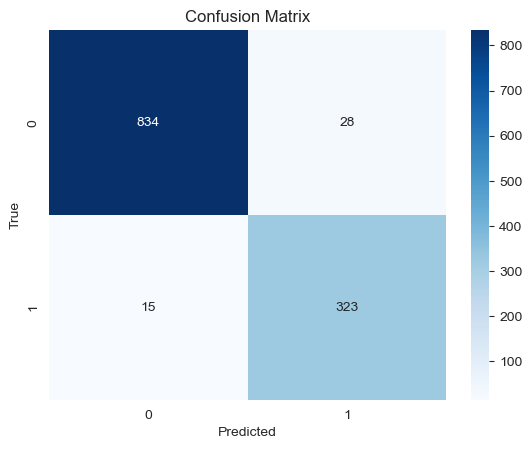

Number of rule-based anomalies detected: 1651
Number of Naive Bayes-based anomalies detected: 1714
Number of autoencoder-based anomalies detected: 300
Number of VAE-based anomalies detected: 300
Total number of anomalies detected by the ensemble model: 1717


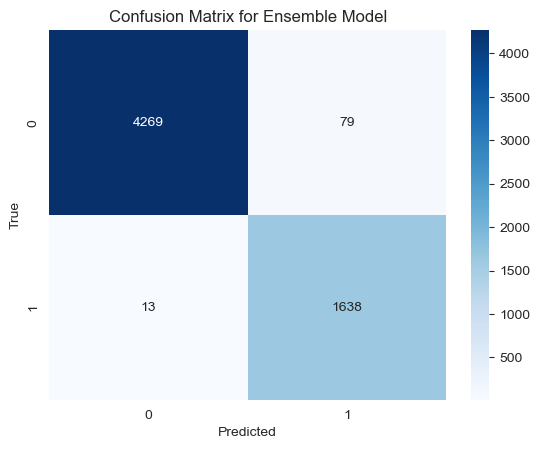

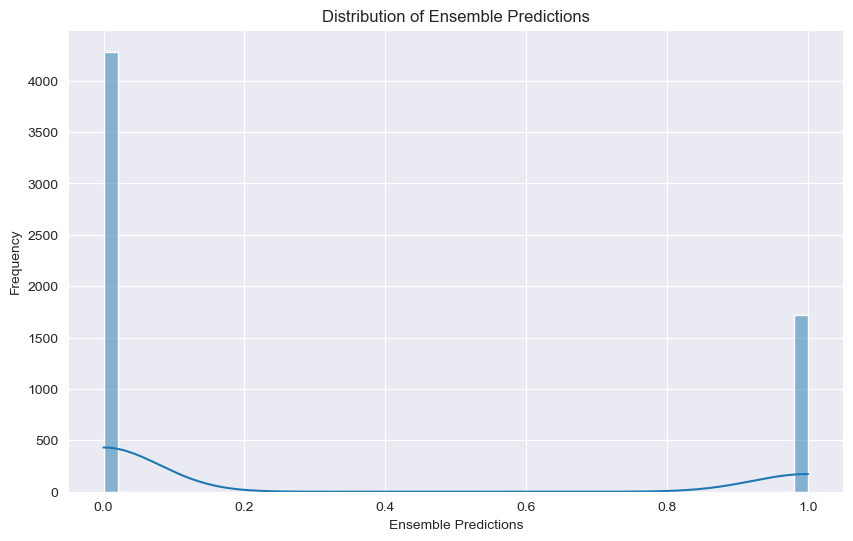

In [70]:

# Preprocess the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Banking_Transactions_Final.select_dtypes(include=[np.number]))

# Handle categorical conversion for 'Flagged Individual' column
Banking_Transactions_Final['Flagged Individual'] = Banking_Transactions_Final['Flagged Individual'].map({'Flagged': 1, 'Regular': 0})

# Fill NaN values with 0 (assuming 'Regular' for NaNs)
Banking_Transactions_Final['Flagged Individual'].fillna(0, inplace=True)

# Create the target variable based on the rule-based anomalies
Banking_Transactions_Final['Conditions_Met'] = (
    Banking_Transactions_Final['Is_high_amount'].astype(int) +
    Banking_Transactions_Final['Is_cross_border'].astype(int) +
    Banking_Transactions_Final['Is_round_amount'].astype(int) +
    Banking_Transactions_Final['Is_out_of_hours'].astype(int) +
    Banking_Transactions_Final['Is_weekend'].astype(int) +
    Banking_Transactions_Final['Flag'].isin(['Grey_listed', 'Black_listed']).astype(int) +
    (~Banking_Transactions_Final['Is_same_currency']).astype(int) +
    Banking_Transactions_Final['Flagged Individual'].astype(int) +
    Banking_Transactions_Final['Transaction type exceeding regular limits'].isin(['Requires Further Verification']).astype(int) +
    (Banking_Transactions_Final['Transactions_last_24h'] > Banking_Transactions_Final['Transactions_last_24h'].quantile(0.95)).astype(int)
)

# Mark rule-based anomalies if 5 or more conditions are met
Banking_Transactions_Final['Is_rule_based_anomaly'] = Banking_Transactions_Final['Conditions_Met'] >= 5

# Drop the auxiliary column if not needed
Banking_Transactions_Final = Banking_Transactions_Final.drop(columns=['Conditions_Met'])

# Impute missing values in the data
imputer = SimpleImputer(strategy='mean')
data_scaled_imputed = imputer.fit_transform(data_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled_imputed, Banking_Transactions_Final['Is_rule_based_anomaly'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Combine all types of anomalies
Banking_Transactions_Final['Is_nb_anomaly'] = gnb.predict(data_scaled_imputed)

# Combine predictions using majority voting
ensemble_predictions = (
    Banking_Transactions_Final['Is_rule_based_anomaly'].astype(int) +
    Banking_Transactions_Final['Is_nb_anomaly'].astype(int) +
    Banking_Transactions_Final['Is_autoencoder_anomaly'].astype(int) +
    Banking_Transactions_Final['Is_vae_anomaly'].astype(int)
)
ensemble_predictions = ensemble_predictions >= 2  # Majority voting

# Add ensemble predictions to the dataframe
Banking_Transactions_Final['Is_ensemble_anomaly'] = ensemble_predictions

# Print out the number of anomalies detected by each model and the ensemble model
print(f"Number of rule-based anomalies detected: {Banking_Transactions_Final['Is_rule_based_anomaly'].sum()}")
print(f"Number of Naive Bayes-based anomalies detected: {Banking_Transactions_Final['Is_nb_anomaly'].sum()}")
print(f"Number of autoencoder-based anomalies detected: {Banking_Transactions_Final['Is_autoencoder_anomaly'].sum()}")
print(f"Number of VAE-based anomalies detected: {Banking_Transactions_Final['Is_vae_anomaly'].sum()}")
print(f"Total number of anomalies detected by the ensemble model: {Banking_Transactions_Final['Is_ensemble_anomaly'].sum()}")

# Confusion matrix for the ensemble model
conf_matrix = confusion_matrix(Banking_Transactions_Final['Is_rule_based_anomaly'], Banking_Transactions_Final['Is_ensemble_anomaly'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Visualize the distribution of ensemble predictions
plt.figure(figsize=(10, 6))
sns.histplot(Banking_Transactions_Final['Is_ensemble_anomaly'], bins=50, kde=True)
plt.title('Distribution of Ensemble Predictions')
plt.xlabel('Ensemble Predictions')
plt.ylabel('Frequency')
plt.show()


## 8 Anomalies Dataframe

In [71]:
# Create a new dataframe with only anomalies detected by all four models
anomalies_all_models = Banking_Transactions_Final[
    (Banking_Transactions_Final['Is_rule_based_anomaly']) &
    (Banking_Transactions_Final['Is_nb_anomaly']) &
    (Banking_Transactions_Final['Is_autoencoder_anomaly']) &
    (Banking_Transactions_Final['Is_vae_anomaly'])
]

# Save anomalies to a new file
anomalies_all_models.to_csv('anomalies_all_models.csv', index=False)

# Save the final file with all anomalies detected by at least one model
anomalies_ensemble = Banking_Transactions_Final[Banking_Transactions_Final['Is_ensemble_anomaly']]
anomalies_ensemble.to_csv('anomalies_ensemble.csv', index=False)

# Display the anomalies detected by all models
print("Anomalies detected by all models (first few rows):")
print(anomalies_all_models.head())

# Display the anomalies detected by at least one model
print("Anomalies detected by at least one model (first few rows):")
print(anomalies_ensemble.head())

# Print the number of rows where anomalies overlap among all four models
print(f"Number of anomalies detected by all four models: {len(anomalies_all_models)}")

# Print the number of rows with anomalies detected by at least one model
print(f"Number of anomalies detected by at least one model: {len(anomalies_ensemble)}")


Anomalies detected by all models (first few rows):
                    Account Open Date  Account Number  Sort Code  \
Transaction on Date                                                
2021-01-21                 2021-01-21        12385338     124379   
2021-01-21                 2021-01-21        12386665     124391   
2021-12-18                 2021-01-21        12386665     124391   
2021-12-18                 2021-01-21        12386665     124391   
2021-12-18                 2021-01-21        12386665     124391   

                     Payer account number  Ben Account Number  \
Transaction on Date                                             
2021-01-21                       12385338            12385338   
2021-01-21                       12386665            12385338   
2021-12-18                       12385656            12386665   
2021-12-18                       12385656            12386665   
2021-12-18                       12385656            12386665   

                

In [74]:
# List of initial columns to keep
initial_columns = [
    'Date Range', 'Total CR Turnover', 'Total of Growth Turnover', 'Account Name', 
    'Account Open Date', 'Account Number', 'Sort Code', 'Total Transactions', 'Transaction Type', 'Ben Account Name', 
    'Ben Account Details', 'Country', 'City'
]

# Create a new dataframe with only anomalies detected by all four models
anomalies_all_models = Banking_Transactions_Final[
    (Banking_Transactions_Final['Is_rule_based_anomaly']) &
    (Banking_Transactions_Final['Is_nb_anomaly']) &
    (Banking_Transactions_Final['Is_autoencoder_anomaly']) &
    (Banking_Transactions_Final['Is_vae_anomaly'])
]

# Select only the initial columns
anomalies_all_models = anomalies_all_models[initial_columns]

# Save anomalies to a new file
anomalies_all_models.to_csv('anomalies_all_models.csv', index=False)

# Save the final file with all anomalies detected by at least one model
anomalies_ensemble = Banking_Transactions_Final[Banking_Transactions_Final['Is_ensemble_anomaly']]
anomalies_ensemble = anomalies_ensemble[initial_columns]

anomalies_ensemble.to_csv('anomalies_ensemble.csv', index=False)

# Display the anomalies detected by all models
print("Anomalies detected by all models (first few rows):")
print(anomalies_all_models.head())

# Display the anomalies detected by at least one model
print("Anomalies detected by at least one model (first few rows):")
print(anomalies_ensemble.head())

# Print the number of rows where anomalies overlap among all four models
print(f"Number of anomalies detected by all four models: {len(anomalies_all_models)}")

# Print the number of rows with anomalies detected by at least one model
print(f"Number of anomalies detected by at least one model: {len(anomalies_ensemble)}")


Anomalies detected by all models (first few rows):
                                        Date Range Total CR Turnover  \
Transaction on Date                                                    
2021-01-21           from 01/01/2021 to 31/12/2021                 $   
2021-01-21           from 01/01/2021 to 31/12/2021                 $   
2021-12-18           from 01/01/2021 to 31/12/2021                 £   
2021-12-18           from 01/01/2021 to 31/12/2021                 £   
2021-12-18           from 01/01/2021 to 31/12/2021                 £   

                    Total of Growth Turnover        Account Name  \
Transaction on Date                                                
2021-01-21                                 $       VTB Bank PJSC   
2021-01-21                                 $  Sberbank of Russia   
2021-12-18                                 £  Sberbank of Russia   
2021-12-18                                 £  Sberbank of Russia   
2021-12-18                          

In [76]:
# List of initial columns to keep along with the contribution columns
columns_to_keep = [
    'Date Range', 'Total CR Turnover', 'Total of Growth Turnover', 'Account Name', 
    'Account Open Date', 'Account Number', 'Sort Code', 'Total Transactions',  'Transaction Type', 'Ben Account Name', 
    'Ben Account Details', 'Country', 'City',
    'Feature_Contribution_NB', 'Feature_Contribution_Rule_Based'
]

# Create a new dataframe with only anomalies detected by all four models
anomalies_all_models = Banking_Transactions_Final[
    (Banking_Transactions_Final['Is_rule_based_anomaly']) &
    (Banking_Transactions_Final['Is_nb_anomaly']) &
    (Banking_Transactions_Final['Is_autoencoder_anomaly']) &
    (Banking_Transactions_Final['Is_vae_anomaly'])
]

# Select only the columns to keep
anomalies_all_models = anomalies_all_models[columns_to_keep]

# Save anomalies to a new file
anomalies_all_models.to_csv('anomalies_all_models.csv', index=False)

# Create a new dataframe with all anomalies detected by at least one model
anomalies_ensemble = Banking_Transactions_Final[Banking_Transactions_Final['Is_ensemble_anomaly']]
anomalies_ensemble = anomalies_ensemble[columns_to_keep]

# Save the final file with all anomalies detected by at least one model
anomalies_ensemble.to_csv('anomalies_ensemble.csv', index=False)

# Display the anomalies detected by all models
print("Anomalies detected by all models (first few rows):")
print(anomalies_all_models.head())

# Display the anomalies detected by at least one model
print("Anomalies detected by at least one model (first few rows):")
print(anomalies_ensemble.head())

# Print the number of rows where anomalies overlap among all four models
print(f"Number of anomalies detected by all four models: {len(anomalies_all_models)}")

# Print the number of rows with anomalies detected by at least one model
print(f"Number of anomalies detected by at least one model: {len(anomalies_ensemble)}")


Anomalies detected by all models (first few rows):
                                        Date Range Total CR Turnover  \
Transaction on Date                                                    
2021-01-21           from 01/01/2021 to 31/12/2021                 $   
2021-01-21           from 01/01/2021 to 31/12/2021                 $   
2021-12-18           from 01/01/2021 to 31/12/2021                 £   
2021-12-18           from 01/01/2021 to 31/12/2021                 £   
2021-12-18           from 01/01/2021 to 31/12/2021                 £   

                    Total of Growth Turnover        Account Name  \
Transaction on Date                                                
2021-01-21                                 $       VTB Bank PJSC   
2021-01-21                                 $  Sberbank of Russia   
2021-12-18                                 £  Sberbank of Russia   
2021-12-18                                 £  Sberbank of Russia   
2021-12-18                          

                                                         ***** The End ******